# Análise da Energia/Eletricidade no Mundo e os seus impactos a nível económico e climático

Datasets encontrados:<br> <br>
1. co2-per-capita-vs-renewable-electricity
2. primary-energy-source-bar
3. SYB64_263_202110_Production Trade and Supply of Energy
4. global-electricity-per-kwh-pricing-2021
5. gdp-per-capita-worldbank
6. GDP_countries


## Perguntas a responder
● Países que consomem mais energia pouco poluente (renovável + nuclear);

● Países que consomem mais energia poluente;

● Países que consomem mais energia nuclear;

● Transição global para energia renovável;

● Países com maior transição para energia renovável;

● Países que consomem mais energia;

● Correlação entre emissão de CO2 e produção de eletricidade via fontes renováveis;

● Países que produzem mais energia;

● Países que exportam mais energia;

● Países que importam mais energia;

● Correlação entre preço da eletricidade e percentagem de eletricidade proveniente de fontes renováveis;


### Descrição dos datasets

In [1]:
#import needed libraries & float format definition

import unicodecsv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm

#pd.options.display.float_format = '{:.0f}'.format
pd.options.display.float_format = '{:,.5f}'.format

In [2]:
# Reading and showing head data

energySourceCountry = pd.read_csv("primary-energy-source-bar.csv")

energySourceCountry['renewable_energy'] = energySourceCountry['Hydro Consumption - TWh'] + energySourceCountry['Wind Consumption - TWh'] + energySourceCountry['Solar Consumption - TWh'] + energySourceCountry['Geo Biomass Other - TWh']
energySourceCountry['renewable_nuclear'] = energySourceCountry['Nuclear Consumption - TWh'] + energySourceCountry['renewable_energy']
energySourceCountry['total_energy'] = energySourceCountry['Coal Consumption - TWh'] + energySourceCountry['Oil Consumption - TWh'] + energySourceCountry['Gas Consumption - TWh'] + energySourceCountry['renewable_nuclear']
energySourceCountry['poluent_energy'] = energySourceCountry['total_energy'] - energySourceCountry['renewable_nuclear']
energySourceCountry['renewable_nuclear_percentage'] = energySourceCountry['renewable_nuclear'] / energySourceCountry['total_energy']



co2PerCapita = pd.read_csv("co2-per-capita-vs-renewable-electricity.csv")
productionAndSupplyEnergy = pd.read_csv("Production_Trade_and_Supply_of_Energy.csv", encoding='latin-1')
electricityPrice2021 = pd.read_excel("global-electricity-per-kwh-pricing-2021.xlsx")
GDP_perCapita = pd.read_csv("gdp-per-capita-worldbank.csv")
GDPcountries = pd.read_excel("GDP_Countries.xlsx")
productionAndSupplyEnergy


,ID,Country/Region,Year,Series,Value
0,1,"Total, all countries or areas",1995,Primary energy production (petajoules),"3,82,594"
1,1,"Total, all countries or areas",2000,Primary energy production (petajoules),"4,13,334"
2,1,"Total, all countries or areas",2005,Primary energy production (petajoules),"4,77,637"
3,1,"Total, all countries or areas",2010,Primary energy production (petajoules),"5,31,540"
4,1,"Total, all countries or areas",2015,Primary energy production (petajoules),"5,70,407"
...,...,...,...,...,...
8405,716,Zimbabwe,2010,Supply per capita (gigajoules),31
8406,716,Zimbabwe,2015,Supply per capita (gigajoules),34
8407,716,Zimbabwe,2016,Supply per capita (gigajoules),33
8408,716,Zimbabwe,2017,Supply per capita (gigajoules),33


#### Pergunta 1: Análise dos  Países que consumiram mais energia pouco poluente (renovável + nuclear) em 2020 e que relação existe com o seu GDP?

Análise do GDP per capita

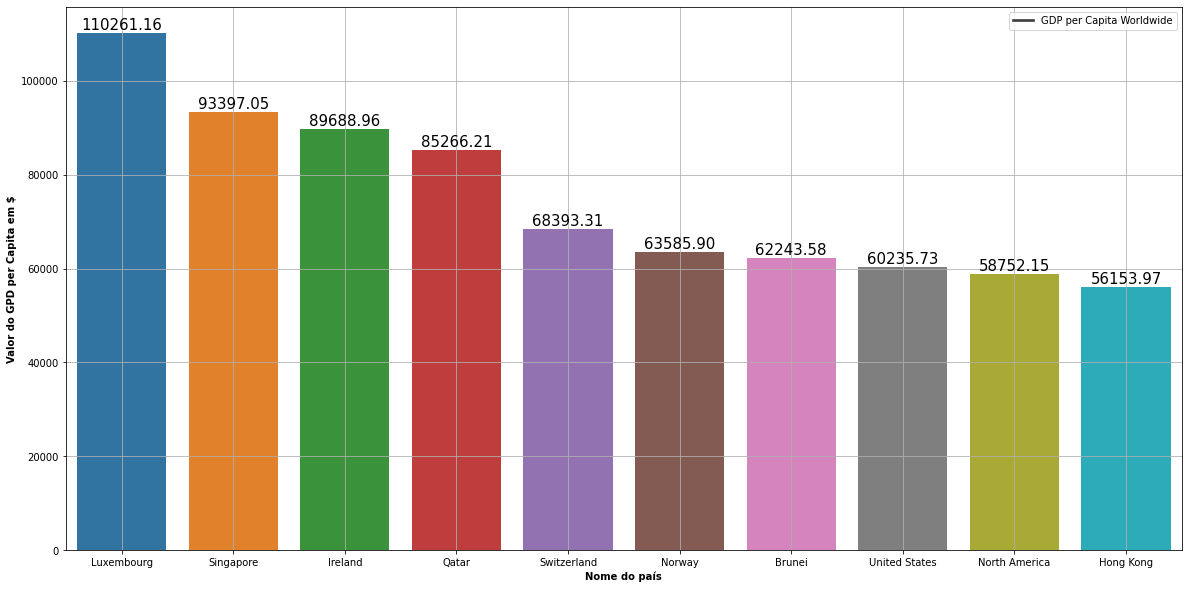

,Entity,Code,Year,GDP per capita
3881,Luxembourg,LUX,2020,"110,261.15735"
5833,Singapore,SGP,2020,"93,397.04880"
3126,Ireland,IRL,2020,"89,688.95696"
5392,Qatar,QAT,2020,"85,266.21059"
6367,Switzerland,CHE,2020,"68,393.30600"
...,...,...,...,...
4746,Niger,NER,2020,"1,196.87756"
1579,Democratic Republic of Congo,COD,2020,"1,072.21011"
1161,Central African Republic,CAF,2020,928.58951
5964,Somalia,SOM,2020,829.61143


In [3]:
#Drop unwated data
GDP_perCapita = GDP_perCapita[GDP_perCapita['Year'].isin([2020])]
GDP_perCapita.rename(columns = {'GDP per capita, PPP (constant 2017 international $)':'GDP per capita'}, inplace = True)

GDP_perCapitaPlot = GDP_perCapita
GDP_perCapitaPlot = GDP_perCapitaPlot.sort_values(by=['GDP per capita'],ascending=False).iloc[:10]
#GDP_perCapitaPlot.plot.bar(x='Entity', y='GDP per capita', rot=0, grid=True, figsize=(20,10))

GDP_perCapitaPlot = pd.DataFrame(GDP_perCapitaPlot, columns=['Entity', 'GDP per capita'])
plt.figure(figsize=(20, 10))
plots = sns.barplot(x="Entity", y="GDP per capita", data=GDP_perCapitaPlot)

for bar in plots.patches:
    
  plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')


plt.xlabel('Nome do país', fontweight='bold')
plt.ylabel('Valor do GPD per Capita em $', fontweight='bold')
plt.legend(['GDP per Capita Worldwide'])
plt.grid()
plt.show()
GDP_perCapita.sort_values(by=['GDP per capita'],ascending=False)

Análise do GDP de cada país

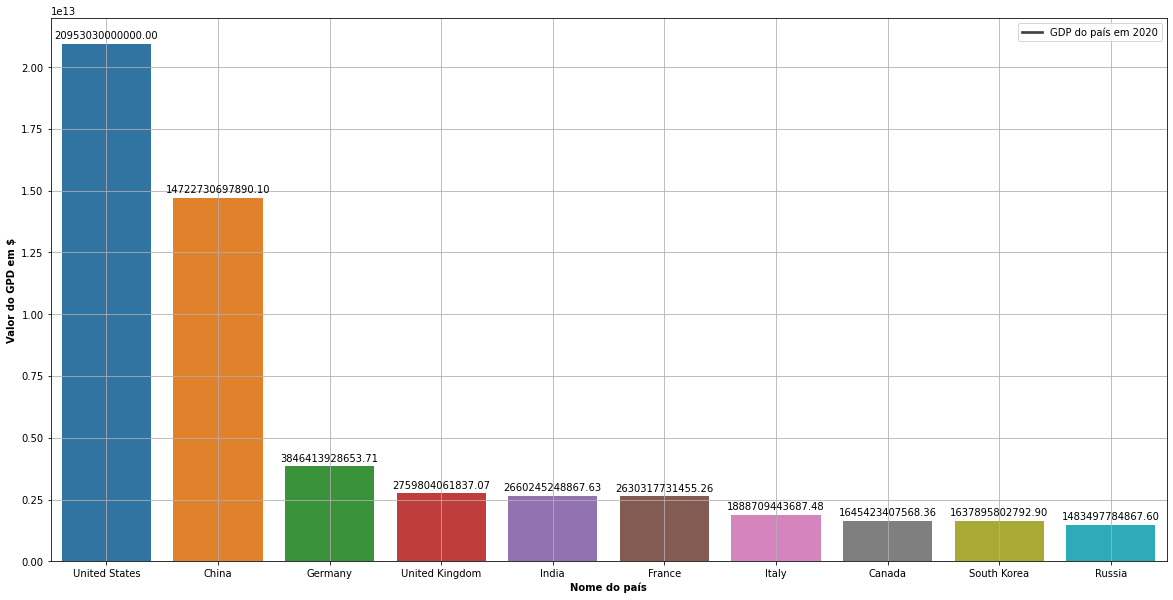

,Code,Country GDP 2020,Entity
168,USA,"20,953,030,000,000.00000",United States
30,CHN,"14,722,730,697,890.09961",China
41,DEU,"3,846,413,928,653.70996",Germany
56,GBR,"2,759,804,061,837.06982",United Kingdom
73,IND,"2,660,245,248,867.62988",India
...,...,...,...
173,WSM,"807,100,820.64813",Samoa
43,DMA,"504,214,814.81481",Dominica
147,STP,"472,914,469.91933",Sao Tome and Principe
86,KIR,"197,508,774.34451",Kiribati


In [4]:
yearList = list(range(1960,2020))
yearList.append(2021)

GDPcountries1 = GDPcountries
GDPcountries1.drop(yearList, axis = 1, inplace = True, errors='ignore')
GDPcountries1.drop(['Indicator Code', 'Indicator Name'], axis = 1, inplace = True)
GDPcountries1.rename(columns = {2020:'Country GDP 2020'}, inplace = True)

GDPcountries1 = GDPcountries1.merge(GDP_perCapita[['Code','Entity']])

GDPcountriesPlot = GDPcountries1
GDPcountriesPlot = GDPcountriesPlot.sort_values(by=['Country GDP 2020'],ascending=False).iloc[:10]
#GDPcountriesPlot.plot.bar(x='Entity', y='Country GDP 2020', rot=0, grid=True, figsize=(20,10))


GDPcountriesPlot = pd.DataFrame(GDPcountriesPlot, columns=['Entity', 'Country GDP 2020'])
plt.figure(figsize=(20, 10))
plots = sns.barplot(x="Entity", y="Country GDP 2020", data=GDPcountriesPlot)

for bar in plots.patches:
    
  plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')


plt.xlabel('Nome do país', fontweight='bold')
plt.ylabel('Valor do GPD em $', fontweight='bold')
plt.legend(['GDP do país em 2020'])
plt.grid()
plt.show()


GDPcountries1.sort_values(by=['Country GDP 2020'],ascending=False)

Vamos agregar a tabela GDP_perCapita e GDPcountries de forma a conter os dois atributos para que possam ser comparados

In [5]:
#Merge GDP_perCapita with GDPcountries based on commom columns
GDP_perCapita_GDPcountries = pd.merge(GDP_perCapita, GDPcountries, 
                   on='Code', 
                   how='outer')
GDP_perCapita_GDPcountries = GDP_perCapita_GDPcountries.sort_values(by=['Country GDP 2020'],ascending=False)
GDP_perCapita_GDPcountries = GDP_perCapita_GDPcountries.loc[GDP_perCapita_GDPcountries['Country GDP 2020'].notna() & GDP_perCapita_GDPcountries['Entity'].notna()]

GDP_perCapita_GDPcountries
#newDataset.loc[newDataset['Code'] == 'USA']

,Entity,Code,Year,GDP per capita,Country GDP 2020
216,United States,USA,"2,020.00000","60,235.72849","20,953,030,000,000.00000"
79,China,CHN,"2,020.00000","16,410.79780","14,722,730,697,890.09961"
106,Germany,DEU,"2,020.00000","50,922.35802","3,846,413,928,653.70996"
215,United Kingdom,GBR,"2,020.00000","41,627.12927","2,759,804,061,837.06982"
119,India,IND,"2,020.00000","6,118.35733","2,660,245,248,867.62988"
...,...,...,...,...,...
183,Samoa,WSM,"2,020.00000","6,295.73184","807,100,820.64813"
91,Dominica,DMA,"2,020.00000","9,891.29194","504,214,814.81481"
184,Sao Tome and Principe,STP,"2,020.00000","4,051.60484","472,914,469.91933"
130,Kiribati,KIR,"2,020.00000","2,291.90722","197,508,774.34451"


Criação da tabela countryEnergy àqual se vai inserir uma nova coluna (renewable_nuclear) que irá conter a soma do consumo da energia: Nuclear + Hídrica + Eólica + Solar + Biomassa.

De seguida, ordenamos a tabela pela coluna que acabámos de criar de forma descendente e ficamos com os países cujo Code não seja NULL e cujo ano seja 2020 e fazemos um gráfico de barras com o TOP 5 de maiores consumidores.

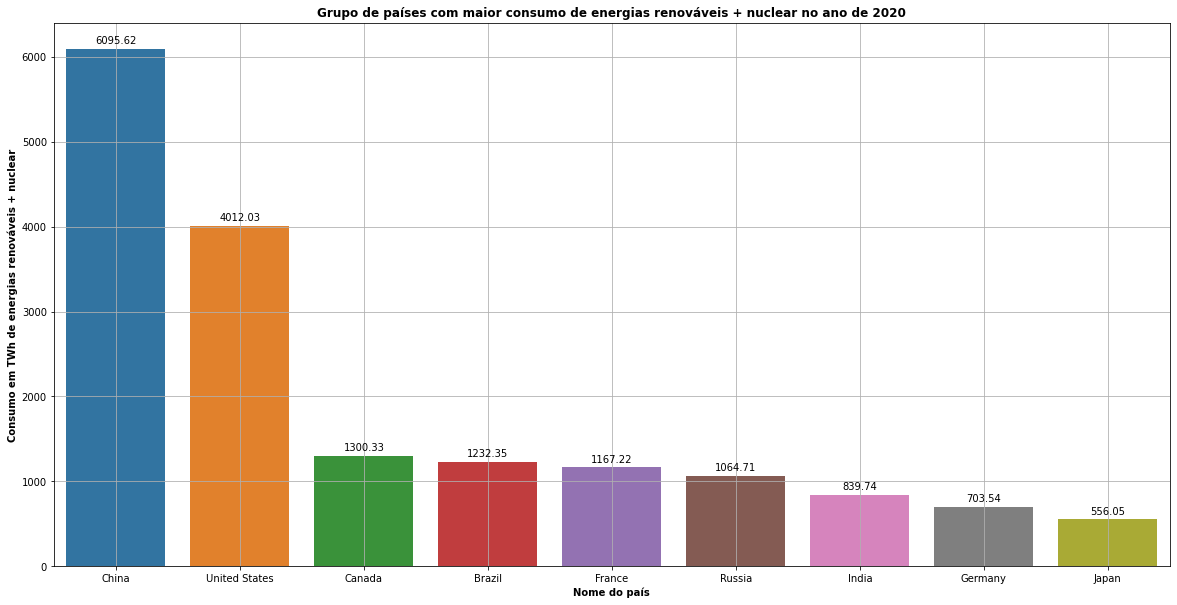

,Entity,Code,Year,Coal Consumption - TWh,Oil Consumption - TWh,Gas Consumption - TWh,Nuclear Consumption - TWh,Hydro Consumption - TWh,Wind Consumption - TWh,Solar Consumption - TWh,Geo Biomass Other - TWh,renewable_energy,renewable_nuclear,total_energy,poluent_energy,renewable_nuclear_percentage
5002,World,OWID_WRL,2020,"42,062.40803","48,259.27114","38,227.77333","6,661.47737","10,600.72704","3,925.71497","2,111.17565",700.06865,"17,337.68631","23,999.16368","152,548.61618","128,549.45250",0.15732
905,China,CHN,2020,"22,852.90616","7,916.45544","3,305.79976",903.45941,"3,261.55535","1,150.91156",644.16508,135.52420,"5,192.15620","6,095.61561","40,170.77698","34,075.16137",0.15174
4742,United States,USA,2020,"2,556.32690","9,038.97415","8,320.19446","2,051.39389",712.19936,841.08816,330.52183,76.82546,"1,960.63481","4,012.02870","23,927.52421","19,915.49550",0.16767
737,Canada,CAN,2020,137.56848,"1,183.49924","1,126.35109",240.61396,949.03190,89.06914,10.91534,10.69489,"1,059.71127","1,300.32523","3,747.74404","2,447.41881",0.34696
569,Brazil,BRA,2020,160.82452,"1,279.66394",321.18170,37.73656,978.94959,140.65944,19.63504,55.36807,"1,194.61214","1,232.34870","2,994.01886","1,761.67016",0.41160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2408,Kuwait,KWT,2020,0.35881,211.37302,206.45203,0.00000,0.00000,0.04322,0.37800,0.00000,0.42123,0.42123,418.60508,418.18386,0.00101
3575,Qatar,QAT,2020,0.00000,125.37910,349.81944,0.00000,0.00000,0.00000,0.02064,0.11484,0.13548,0.13548,475.33402,475.19854,0.00029
1756,Hong Kong,HKG,2020,38.23056,170.09183,49.44259,0.00000,0.00000,0.00204,0.00277,0.12014,0.12495,0.12495,257.88993,257.76497,0.00048
4538,Turkmenistan,TKM,2020,0.00000,76.82636,313.00000,0.00000,0.00778,0.00000,0.01717,0.00000,0.02494,0.02494,389.85131,389.82636,0.00006


In [6]:
countryEnergy = energySourceCountry.copy(deep=True)

countryEnergy = countryEnergy.sort_values(by=['renewable_nuclear'],ascending=False)

cond1 = countryEnergy['Code'].notna()
cond2 = countryEnergy['Year'] == 2020

countryEnergy = countryEnergy.loc[(cond1) & (cond2)]
countryEnergyPlot = countryEnergy.iloc[1:10]
#countryEnergyPlot.plot.bar(x='Entity', y='renewable_nuclear', rot=0, grid=True, figsize=(20,10))


countryEnergyPlot = pd.DataFrame(countryEnergyPlot, columns=['Entity', 'renewable_nuclear'])
plt.figure(figsize=(20, 10))
plots = sns.barplot(x="Entity", y="renewable_nuclear", data=countryEnergyPlot)

for bar in plots.patches:
    
  plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')


plt.xlabel('Nome do país', fontweight='bold')
plt.title('Grupo de países com maior consumo de energias renováveis + nuclear no ano de 2020', fontweight='bold')
plt.ylabel('Consumo em TWh de energias renováveis + nuclear', fontweight='bold')
#plt.legend(['Energia renovável + Nuclear'])
plt.grid()
plt.show()
countryEnergy



Comparação entre energia consumida e a quantidade dela que é renovável ou nuclear (países que consomem mais)

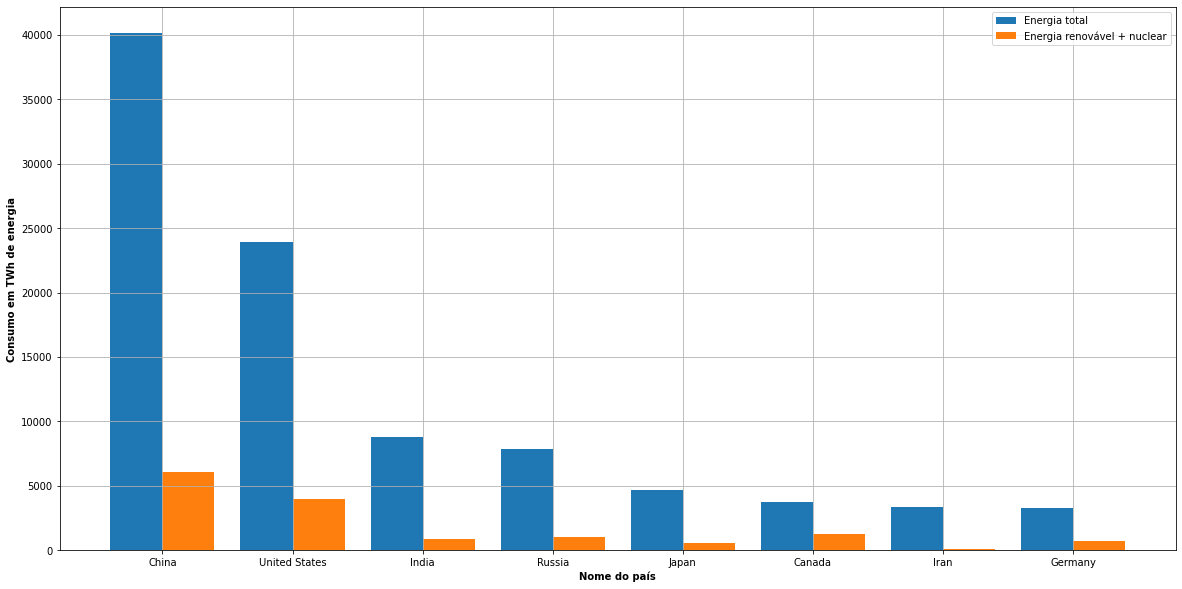

In [7]:
countryEnergy = energySourceCountry.copy(deep=True)

countryEnergy = countryEnergy.sort_values(by=['total_energy'],ascending=False)

cond1 = countryEnergy['Code'].notna()
cond2 = countryEnergy['Year'] == 2020

countryEnergy = countryEnergy.loc[(cond1) & (cond2)].iloc[1:9]

X_axis = np.arange(len(countryEnergy))

plt.figure(figsize=(20, 10))
plt.bar(X_axis - 0.2, countryEnergy['total_energy'], 0.4, label = 'Energia total')
plt.bar(X_axis + 0.2, countryEnergy['renewable_nuclear'], 0.4, label = 'Energia renovável + nuclear')
plt.xticks(X_axis, countryEnergy['Entity'])

plt.rcParams["figure.figsize"] = (18,6)
plt.xlabel('Nome do país', fontweight='bold')
plt.ylabel('Consumo em TWh de energia', fontweight='bold')
plt.grid()
plt.legend()
plt.show()



Países com maior percentagem de consumo de energia renovável ou nuclear

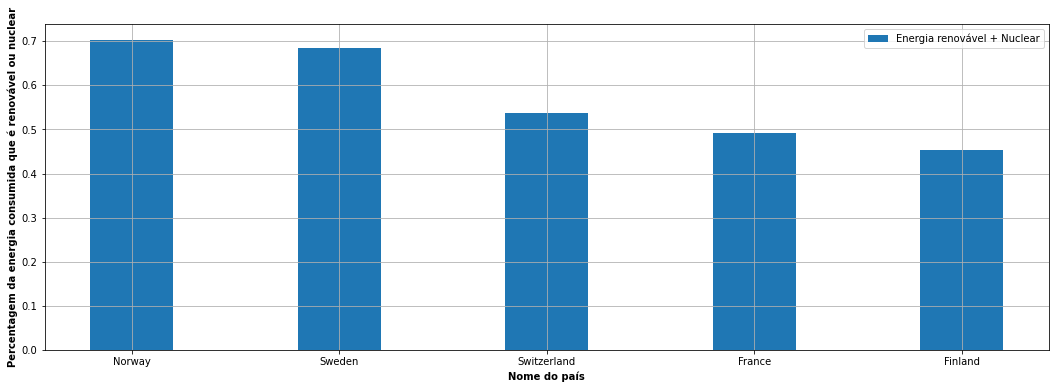

,Entity,Code,Year,Coal Consumption - TWh,Oil Consumption - TWh,Gas Consumption - TWh,Nuclear Consumption - TWh,Hydro Consumption - TWh,Wind Consumption - TWh,Solar Consumption - TWh,Geo Biomass Other - TWh,renewable_energy,renewable_nuclear,total_energy,poluent_energy,renewable_nuclear_percentage
3127,Norway,NOR,2020,9.07050,103.88756,44.31956,0.00000,347.79559,24.40093,0.33309,0.25974,372.78936,372.78936,530.06698,157.27762,0.70329
4222,Sweden,SWE,2020,20.79011,151.40372,10.57832,132.80668,180.94707,69.25546,2.60634,10.99134,263.80021,396.60688,579.37903,182.77215,0.68454
4278,Switzerland,CHE,2020,1.05833,102.60957,32.30837,56.71909,92.99555,0.41783,6.47203,1.94161,101.82702,158.54611,294.52238,135.97627,0.53832
1588,France,FRA,2020,53.78302,743.85998,406.62284,872.94821,151.24241,100.17449,32.25707,10.59526,294.26923,"1,167.21744","2,371.48328","1,204.26584",0.49219
1532,Finland,FIN,2020,36.86537,98.27701,19.57611,58.06302,38.89577,19.86156,0.63796,11.23368,70.62898,128.69200,283.41049,154.71849,0.45408


In [8]:
countryEnergy = energySourceCountry.copy(deep=True)

countryEnergy = countryEnergy.sort_values(by=['renewable_nuclear_percentage'],ascending=False)

cond1 = countryEnergy['Code'].notna()
cond2 = countryEnergy['Year'] == 2020

countryEnergy = countryEnergy.loc[(cond1) & (cond2)].iloc[1:6]

X_axis = np.arange(len(countryEnergy))

plt.bar(X_axis, countryEnergy['renewable_nuclear_percentage'], 0.4, label = 'Energia renovável + Nuclear')
plt.xticks(X_axis, countryEnergy['Entity'])

plt.rcParams["figure.figsize"] = (12,8)
plt.xlabel('Nome do país', fontweight='bold')
plt.grid()
plt.ylabel('Percentagem da energia consumida que é renovável ou nuclear', fontweight='bold')
plt.legend()
plt.show()
countryEnergy

Correlação entre GDP (2020), GDP per capita e o consumo de energias renováveis + nuclear

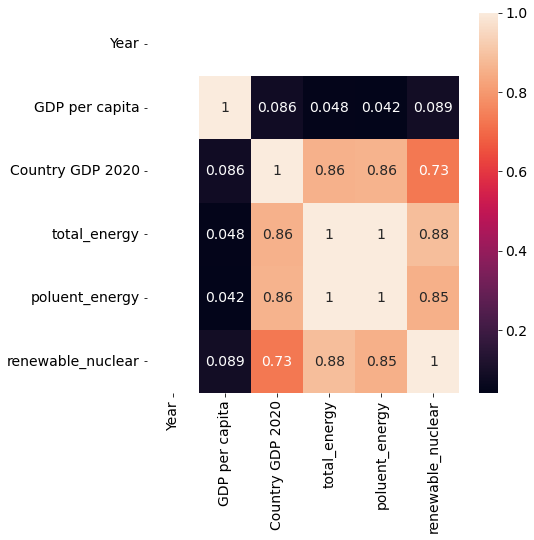

,Entity,Code,Year,Coal Consumption - TWh,Oil Consumption - TWh,Gas Consumption - TWh,Nuclear Consumption - TWh,Hydro Consumption - TWh,Wind Consumption - TWh,Solar Consumption - TWh,Geo Biomass Other - TWh,renewable_energy,renewable_nuclear,total_energy,poluent_energy,renewable_nuclear_percentage
0,Africa,NaN,1965,323.49614,327.33316,9.54375,0.00000,38.62676,0.00000,0.00000,0.00000,38.62676,38.62676,698.99982,660.37306,0.05526
1,Africa,NaN,1966,323.12219,358.13267,10.66992,0.00000,43.08334,0.00000,0.00000,0.00000,43.08334,43.08334,735.00813,691.92478,0.05862
2,Africa,NaN,1967,330.29158,355.28146,10.54567,0.00000,44.97399,0.00000,0.00000,0.00000,44.97399,44.97399,741.09270,696.11871,0.06069
3,Africa,NaN,1968,343.51291,374.85213,10.68897,0.00000,52.60650,0.00000,0.00000,0.00000,52.60650,52.60650,781.66051,729.05401,0.06730
4,Africa,NaN,1969,346.64292,379.97309,12.49200,0.00000,61.39136,0.00000,0.00000,0.00000,61.39136,61.39136,800.49937,739.10801,0.07669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4998,World,OWID_WRL,2016,"43,501.65456","51,908.10511","35,586.37067","6,573.43101","10,106.12678","2,419.80262",825.82079,560.68108,"13,912.43128","20,485.86229","151,481.99262","130,996.13033",0.13524
4999,World,OWID_WRL,2017,"43,721.38122","52,640.10397","36,536.59394","6,593.08673","10,166.79569","2,850.77737","1,115.13541",593.79098,"14,726.49945","21,319.58618","154,217.66532","132,898.07914",0.13824
5000,World,OWID_WRL,2018,"44,238.97533","53,146.71656","38,378.96172","6,702.01955","10,380.65606","3,155.24110","1,433.94316",632.17391,"15,602.01422","22,304.03377","158,068.68738","135,764.65361",0.14110
5001,World,OWID_WRL,2019,"43,788.65106","53,302.64633","39,039.40236","6,924.99221","10,469.15428","3,511.69605","1,752.95945",663.13429,"16,396.94407","23,321.93629","159,452.63604","136,130.69975",0.14626


In [9]:
countryEnergy = energySourceCountry.copy(deep=True)
energySourceCountry
countryGDP_renewableEnergy= GDP_perCapita_GDPcountries.merge(countryEnergy[['Code','total_energy', 'poluent_energy', 'renewable_nuclear']])
correlation = countryGDP_renewableEnergy.corr()

fig = plt.figure(figsize=(7, 7))
plt.rcParams['font.size'] = '14'
sns.heatmap(correlation, annot=True)
plt.show()

"""correlationDataset = pd.merge(newDataset, countryEnergy, 
                   on=['Code', 'Year', 'Entity'], 
                   how='outer')
correlationDataset
"""
energySourceCountry

#### Pergunta 2: Países que consomem mais energia poluente;

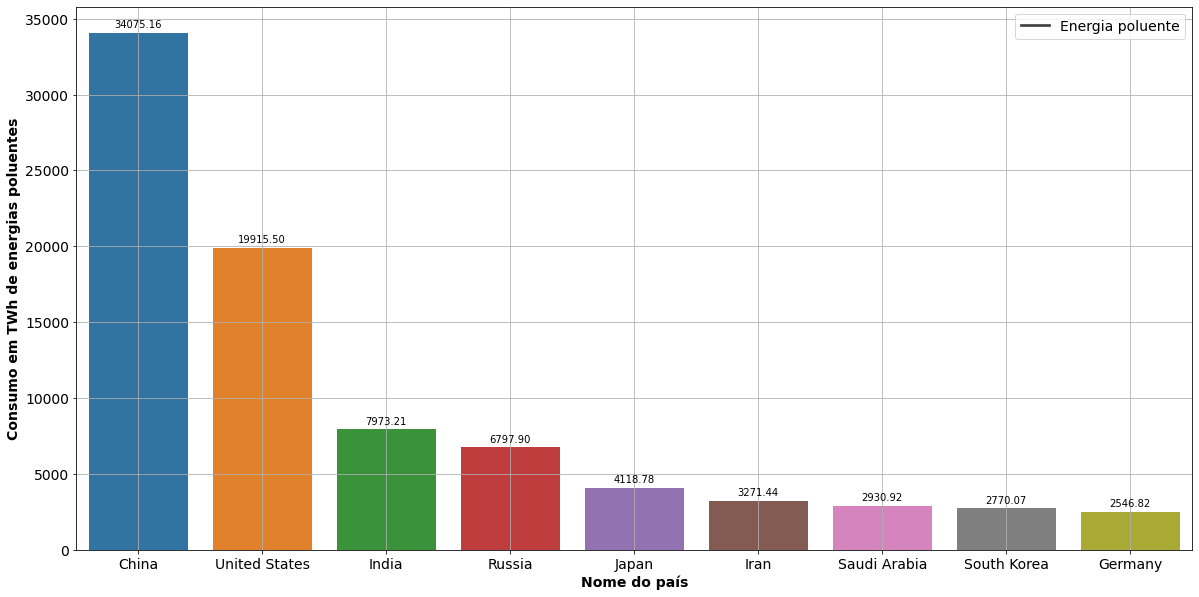

In [10]:
countryPoluentEnergy = energySourceCountry.copy(deep=True)

countryPoluentEnergy = countryPoluentEnergy.sort_values(by=['poluent_energy'],ascending=False)

cond1 = countryPoluentEnergy['Code'].notna()
cond2 = countryPoluentEnergy['Year'] == 2020

countryPoluentEnergy = countryPoluentEnergy.loc[(cond1) & (cond2)]
countryPoluentEnergyPlot = countryPoluentEnergy.iloc[1:10]
#countryPoluentEnergyPlot.plot.bar(x='Entity', y='PoluentEnergy', rot=0, grid=True, figsize=(20,10))

countryPoluentEnergyPlot = pd.DataFrame(countryPoluentEnergyPlot, columns=['Entity', 'poluent_energy'])
plt.figure(figsize=(20, 10))
plots = sns.barplot(x="Entity", y="poluent_energy", data=countryPoluentEnergyPlot)

#Colocar os valores por cima de cada coluna
for bar in plots.patches:
    
  plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.grid()
plt.xlabel('Nome do país', fontweight='bold')
plt.ylabel('Consumo em TWh de energias poluentes', fontweight='bold')
plt.legend(['Energia poluente'])
plt.show()

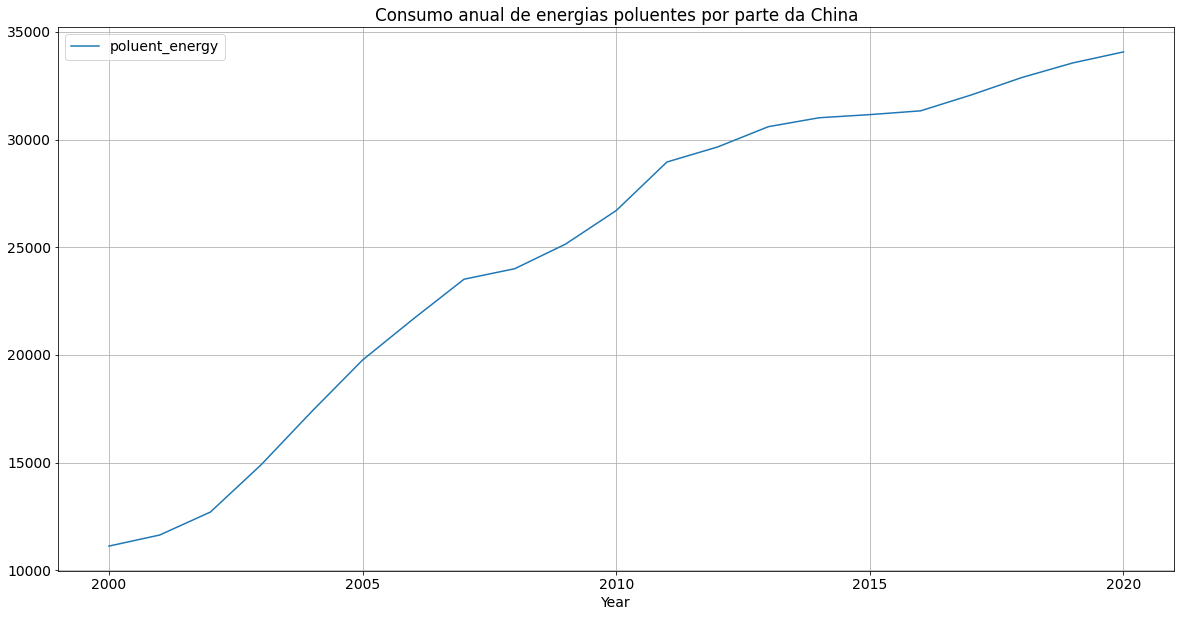

,Entity,Code,Year,Coal Consumption - TWh,Oil Consumption - TWh,Gas Consumption - TWh,Nuclear Consumption - TWh,Hydro Consumption - TWh,Wind Consumption - TWh,Solar Consumption - TWh,Geo Biomass Other - TWh,renewable_energy,renewable_nuclear,total_energy,poluent_energy,renewable_nuclear_percentage
885,China,CHN,2000,"8,211.40621","2,661.13700",246.95747,46.49167,617.80556,1.63861,0.06111,2.53700,622.04228,668.53394,"11,788.03462","11,119.50068",0.05671
886,China,CHN,2001,"8,635.75475","2,720.86759",276.45772,48.21818,765.63474,1.98478,0.08555,2.55400,770.25908,818.47726,"12,451.55732","11,633.08006",0.06573
887,China,CHN,2002,"9,467.45754","2,938.00831",294.13569,68.89661,789.59516,2.29602,0.13161,2.54600,794.56880,863.46541,"13,563.06696","12,699.60154",0.06366
888,China,CHN,2003,"11,283.05858","3,271.52446",341.74730,118.07917,772.84615,2.71610,0.17436,2.53600,778.27262,896.35178,"15,792.68211","14,896.33033",0.05676
889,China,CHN,2004,"13,155.27970","3,820.07197",399.83970,136.61990,957.04586,3.45895,0.20573,2.52800,963.23854,"1,099.85845","18,475.04982","17,375.19137",0.05953
890,China,CHN,2005,"15,405.10574","3,886.77454",469.75108,142.80000,"1,067.92547",5.23466,0.22595,5.32200,"1,078.70808","1,221.50808","20,983.13945","19,761.63137",0.05821
891,China,CHN,2006,"16,918.38174","4,174.97446",577.83757,146.59292,"1,164.83679",9.92153,0.25393,7.13300,"1,182.14525","1,328.73817","22,999.93195","21,671.19377",0.05777
892,China,CHN,2007,"18,423.91294","4,381.04255",710.77899,165.03281,"1,288.98250",14.55437,0.30281,9.86300,"1,313.70268","1,478.73550","24,994.46997","23,515.73447",0.05916
893,China,CHN,2008,"18,715.92062","4,469.13024",819.32906,180.54317,"1,681.41615",34.58075,0.40124,14.86600,"1,731.26414","1,911.80730","25,916.18723","24,004.37993",0.07377
894,China,CHN,2009,"19,605.60127","4,637.32009",902.24030,183.77415,"1,615.11543",72.44675,0.73194,20.85932,"1,709.15345","1,892.92760","27,038.08926","25,145.16166",0.07001


In [11]:
chinaDataset = energySourceCountry.copy(deep=True)
chinaDataset = chinaDataset.loc[(chinaDataset['Code'] == 'CHN') & (chinaDataset['Year'] > 1999)]


ax = chinaDataset[['Year','poluent_energy']].groupby(['Year']).sum().plot(rot=0, grid=True, figsize=(20,10))
ax.locator_params(integer=True)
plt.title('Consumo anual de energias poluentes por parte da China')
plt.show()
chinaDataset


#### Pergunta 3: Quais são os países que consomem mais energia nuclear?


Code
CAN       2,750.95490
CHN       5,388.59410
DEU       2,568.19203
ESP         616.00257
FRA      11,558.76375
GBR       1,561.01231
JPN       1,347.02426
KOR       4,212.53805
Others   10,686.70825
RUS       5,306.89376
SWE       1,464.48087
UKR       2,378.95883
USA      23,364.68344
Name: Nuclear Consumption - TWh, dtype: float64

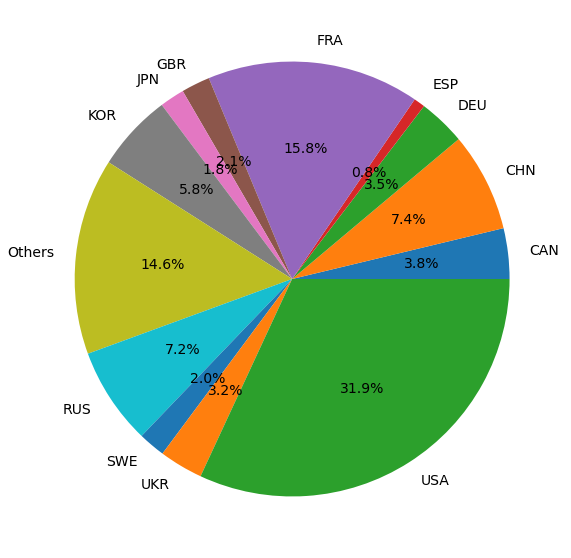

In [12]:
#Quais foram os países que mais consumiram energia nuclear a partir de 2010
cond1 = ['World', 'OECD', 'Europe', 'North America', 'European Union']
energySourceCountry1 = energySourceCountry[(~energySourceCountry['Entity'].isin(cond1)) & (energySourceCountry['Code'].notna()) & (energySourceCountry['Year'] >= 2010)]
#energySourceCountry1 = energySourceCountry.loc[energySourceCountry.groupby('Year')['Nuclear Consumption - TWh']]
#energySourceCountry1 = energySourceCountry1.sort_values(by=['Nuclear Consumption - TWh'],ascending=False)

soma = energySourceCountry1['Nuclear Consumption - TWh'].sum()
threshold = 0.002 * soma

df_draw = energySourceCountry1.copy()
df_draw.loc[df_draw['Nuclear Consumption - TWh'] < threshold, 'Code'] = 'Others'
df_draw = df_draw.groupby('Code')['Nuclear Consumption - TWh'].sum().reset_index()
plt.figure(figsize=(20, 10))
plt.pie(df_draw['Nuclear Consumption - TWh'], labels=df_draw['Code'], autopct='%1.1f%%');



#energySourceCountry1.groupby(['Code'])['Nuclear Consumption - TWh'].sum().plot.pie(y='Nuclear Consumption - TWh',autopct='%1.1f%%', shadow=True, figsize=(20,10))
#plt.show()
df_draw.groupby('Code')['Nuclear Consumption - TWh'].sum()

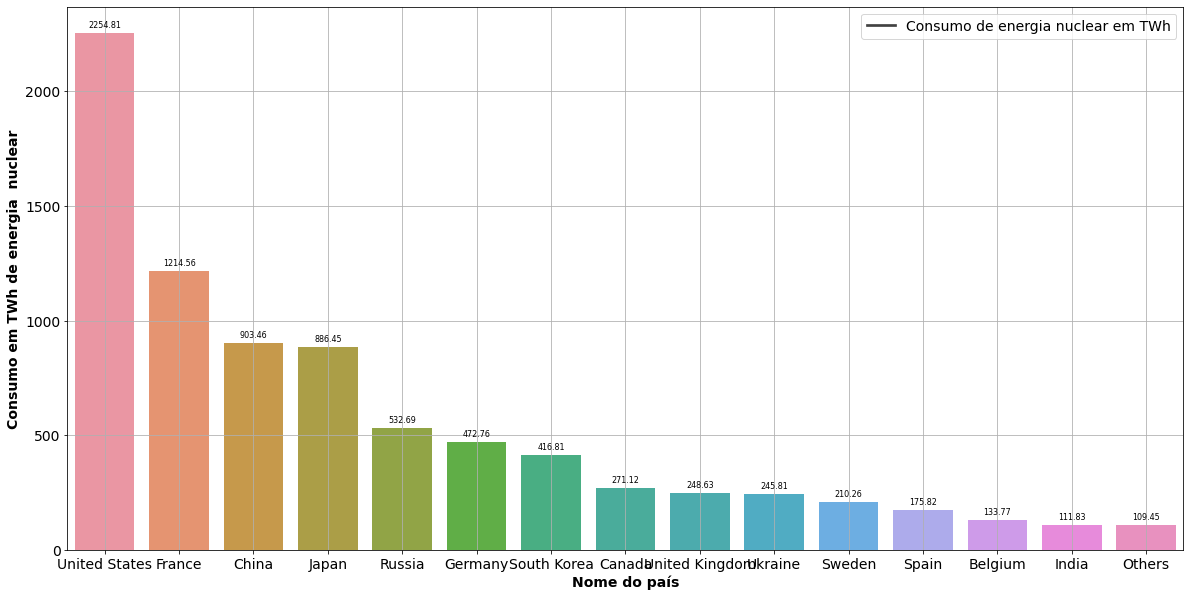

,Entity,Year,Nuclear Consumption - TWh
4729,United States,2007,"2,254.80605"
1573,France,2005,"1,214.55585"
905,China,2020,903.45941
2296,Japan,2000,886.44882
3687,Russia,2020,532.68648
1625,Germany,2001,472.75731
4049,South Korea,2015,416.80968
731,Canada,2014,271.12082
4667,United Kingdom,2001,248.63240
4561,Ukraine,2007,245.81469


In [13]:
#em que ano o país consumiu mais energia nuclear
cond1 = ['World', 'OECD', 'Europe', 'North America', 'European Union']

energySourceCountry2 = energySourceCountry.copy()
energySourceCountry2 = energySourceCountry2[(~energySourceCountry2['Entity'].isin(cond1)) & (energySourceCountry2['Code'].notna()) & (energySourceCountry2['Year'] >= 2000)]
energySourceCountry2.loc[energySourceCountry2['Nuclear Consumption - TWh'] < 110, 'Entity'] = 'Others'
energySourceCountry2 = energySourceCountry2.loc[energySourceCountry2.groupby('Entity')['Nuclear Consumption - TWh'].idxmax()]
energySourceCountry2 = energySourceCountry2.sort_values(by=['Nuclear Consumption - TWh'],ascending=False)



energySourceCountry2 = pd.DataFrame(energySourceCountry2, columns=["Entity",'Year', 'Nuclear Consumption - TWh'])
plt.figure(figsize=(20, 10))
plots = sns.barplot(x="Entity", y="Nuclear Consumption - TWh", data=energySourceCountry2)

#Colocar os valores por cima de cada coluna
for bar in plots.patches:
    
  plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

plt.grid()
plt.xlabel('Nome do país', fontweight='bold')
plt.ylabel('Consumo em TWh de energia  nuclear', fontweight='bold')
plt.legend(['Consumo de energia nuclear em TWh'])
plt.show()
energySourceCountry2

#NOTA: FALTA COLOCAR NO X AXIS O ANO EM QUE O CONSUMO FOI MAIOR DE FORMA A FICAR ASSIM: (UNITED STATES, 2007)

In [14]:
#Quais foram os países que mais  onsumiram energia nuclear em 2020 comprativamente a 1990
energySourceCountry1 = energySourceCountry.copy()


cond1 = ['World', 'OECD', 'Europe', 'North America', 'European Union']

energySourceCountry2020 = energySourceCountry.copy()
energySourceCountry2020 = energySourceCountry2020[(~energySourceCountry2020['Entity'].isin(cond1)) & (energySourceCountry2020['Code'].notna()) & (energySourceCountry2020['Year'] == 2020)]
#energySourceCountry2020.loc[energySourceCountry2020['Nuclear Consumption - TWh'] < 110, 'Entity'] = 'Others'
#energySourceCountry2020 = energySourceCountry2020.sort_values(by=['Nuclear Consumption - TWh'],ascending=False)

energySourceCountry1990 = energySourceCountry.copy()
energySourceCountry1990 = energySourceCountry1990[(~energySourceCountry1990['Entity'].isin(cond1)) & (energySourceCountry1990['Code'].notna()) & (energySourceCountry1990['Year'] == 1990)]
energySourceCountry1990.loc[energySourceCountry1990['Nuclear Consumption - TWh'] < 110, 'Entity'] = 'Others'
energySourceCountry1990 = energySourceCountry1990.sort_values(by=['Nuclear Consumption - TWh'],ascending=False)

energySourceCountry2020 = energySourceCountry2020.iloc[:,[0, 1, 2, 6]]
energySourceCountry2020

,Entity,Code,Year,Nuclear Consumption - TWh
111,Algeria,DZA,2020,0.00000
167,Argentina,ARG,2020,26.30548
279,Australia,AUS,2020,0.00000
335,Austria,AUT,2020,0.00000
371,Azerbaijan,AZE,2020,0.00000
...,...,...,...,...
4686,United Kingdom,GBR,2020,124.04261
4742,United States,USA,2020,"2,051.39389"
4778,Uzbekistan,UZB,2020,0.00000
4834,Venezuela,VEN,2020,0.00000


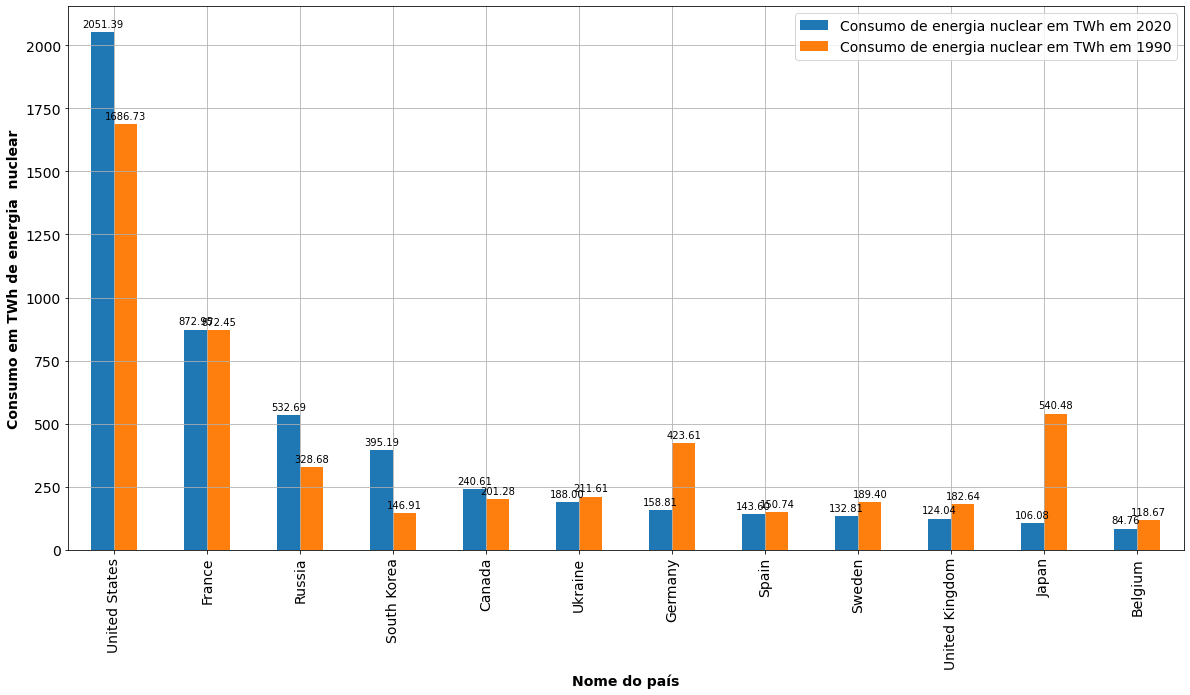

,Entity,Nuclear Consumption - TWh_x,Nuclear Consumption - TWh_y
0,United States,"2,051.39389","1,686.73005"
1,France,872.94821,872.44722
4,Russia,532.68648,328.68060
10,South Korea,395.19249,146.90712
6,Canada,240.61396,201.27778
5,Ukraine,188.00073,211.60833
3,Germany,158.81346,423.61111
9,Spain,143.60294,150.74444
7,Sweden,132.80668,189.40278
8,United Kingdom,124.04261,182.63611


In [15]:
energySourceCountry1990= energySourceCountry1990.iloc[:,[0, 1, 2, 6]]
energySourceCountry1990.rename(columns = {'Year':'Year1990'}, inplace = True)

nuclearEnergy2020_1990 = pd.merge(energySourceCountry2020, energySourceCountry1990, 
                   on=['Code', 'Entity'], 
                   how='right')

nuclearEnergy2020_1990['Nuclear Consumption - TWh_x'] = nuclearEnergy2020_1990['Nuclear Consumption - TWh_x'].replace(np.nan, 0)
nuclearEnergy2020_1990 = nuclearEnergy2020_1990[(nuclearEnergy2020_1990['Entity'] != 'Others')]

nuclearEnergy2020_1990 = nuclearEnergy2020_1990.sort_values(by=['Nuclear Consumption - TWh_x'],ascending=False)

#nuclearEnergy2000_1990 = nuclearEnergy2000_1990.groupby('Entity').mean()
nuclearEnergy2020_1990 = pd.DataFrame(nuclearEnergy2020_1990, columns=['Entity', 'Nuclear Consumption - TWh_x', 'Nuclear Consumption - TWh_y'])
plots = nuclearEnergy2020_1990.plot(x='Entity', y=['Nuclear Consumption - TWh_x', 'Nuclear Consumption - TWh_y'], kind='bar', figsize=(20,10))

#Colocar os valores por cima de cada coluna
for bar in plots.patches:
    
  plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')


plt.grid()
plt.xlabel('Nome do país', fontweight='bold')
plt.ylabel('Consumo em TWh de energia  nuclear', fontweight='bold')
plt.legend(['Consumo de energia nuclear em TWh em 2020', 'Consumo de energia nuclear em TWh em 1990'])
plt.show()
nuclearEnergy2020_1990





#### Pergunta 4: Transição global para energia renovável

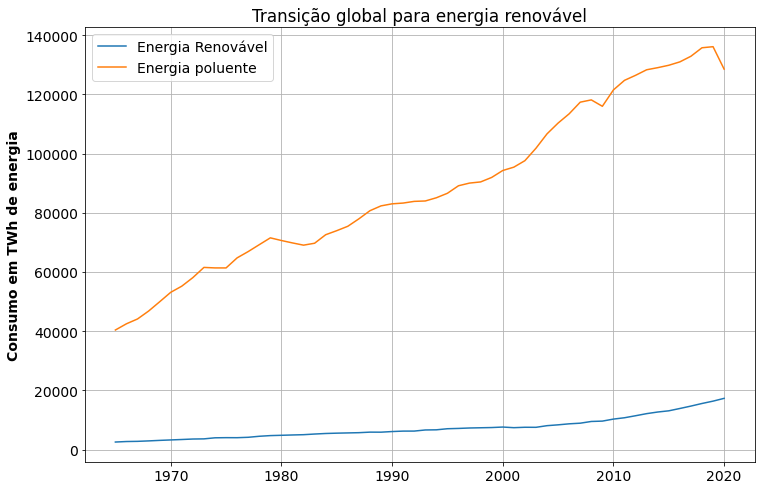

In [16]:
countryEnergy = energySourceCountry.copy(deep=True)

#countryEnergy = countryEnergy.sort_values(by=['total_energy'],ascending=False)

cond1 = countryEnergy['Code'].notna()
cond2 = countryEnergy['Year'] <= 1990
cond3 = countryEnergy['Entity'] == 'Europe'
cond4 = countryEnergy['Year'] > 1990

countryEnergy19 = countryEnergy.loc[(cond1) & (cond2) & (cond3)].iloc[1:9]
countryEnergy20 = countryEnergy.loc[(cond1) & (cond4) & (cond3)].iloc[1:9]

worldDataset = energySourceCountry.copy(deep=True)
worldDataset = worldDataset.loc[(worldDataset['Code'] == 'OWID_WRL')]


ax = worldDataset[['Year','renewable_energy']].groupby(['Year']).sum()
ax2 = worldDataset[['Year','poluent_energy']].groupby(['Year']).sum()
plt.plot(ax)
plt.plot(ax2)
plt.title('Transição global para energia renovável')
plt.legend(['Energia Renovável', 'Energia poluente'])
plt.ylabel('Consumo em TWh de energia', fontweight='bold')
plt.grid()
plt.show()


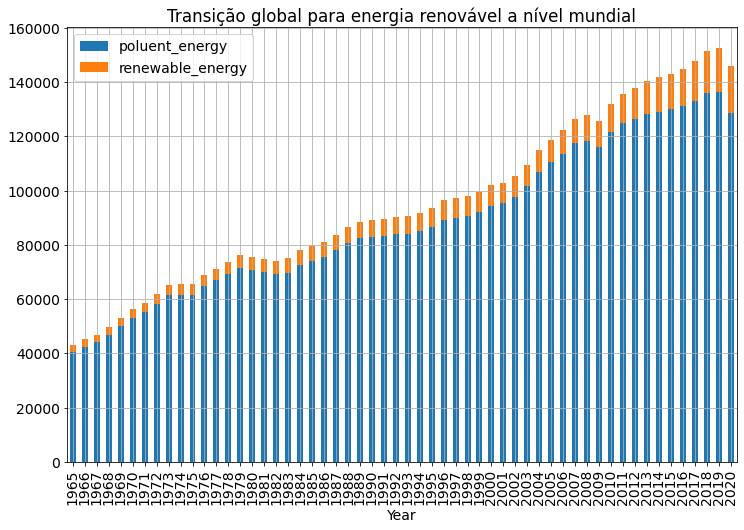

In [17]:
ax = worldDataset[['Year', 'poluent_energy','renewable_energy']].groupby(['Year']).sum()
ax.plot.bar(stacked=True)

plt.title('Transição global para energia renovável a nível mundial')
plt.grid()
plt.figsize=(20,10)
plt.show()

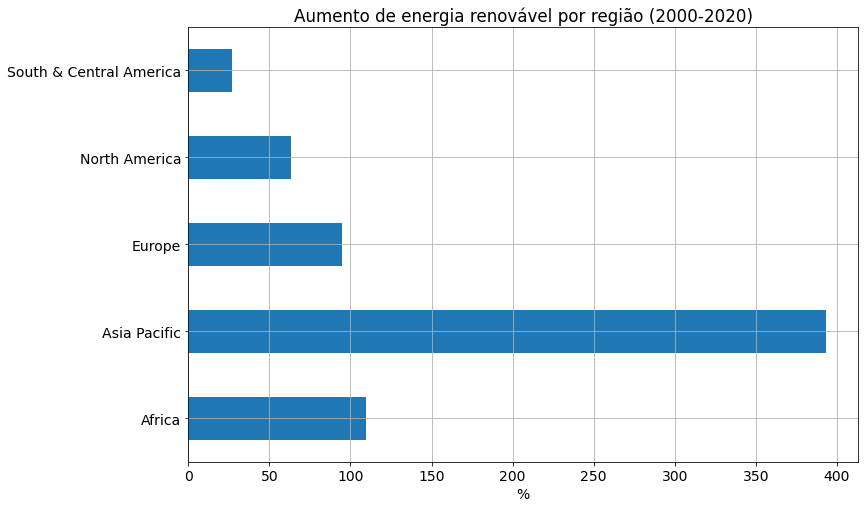

In [18]:
worldEnergy2000s = energySourceCountry.copy(deep=True)
worldEnergy2000s = worldEnergy2000s.loc[(worldEnergy2000s['Entity'] == 'North America') | (worldEnergy2000s['Entity'] == 'South & Central America') | (worldEnergy2000s['Entity'] == 'Europe') | (worldEnergy2000s['Entity'] == 'Africa') | (worldEnergy2000s['Entity'] == 'Asia Pacific')]
worldEnergy2000s = worldEnergy2000s.loc[(worldEnergy2000s['Year'] == 2000) | (worldEnergy2000s['Year'] == 2020)]

increase = []
prev = None
for index, value in worldEnergy2000s['renewable_energy'].items():
    if prev == None:
        prev = value
    else:
        increase.append(((value-prev)/abs(prev))*100)
        prev = None

d = {'Africa': increase[0], 'Asia Pacific': increase[1], 'Europe': increase[2], 'North America': increase[3], 'South & Central America': increase[4]}

increase = pd.DataFrame.from_dict(d, orient='index')
increase


ax = increase[0]
ax.plot.barh()

plt.title('Aumento de energia renovável por região (2000-2020)')
plt.grid()
plt.figsize=(20,10)
plt.xlabel('%')
plt.show()

#### Pergunta 5: Países com maior transição para energia renovável a partir de 2000;

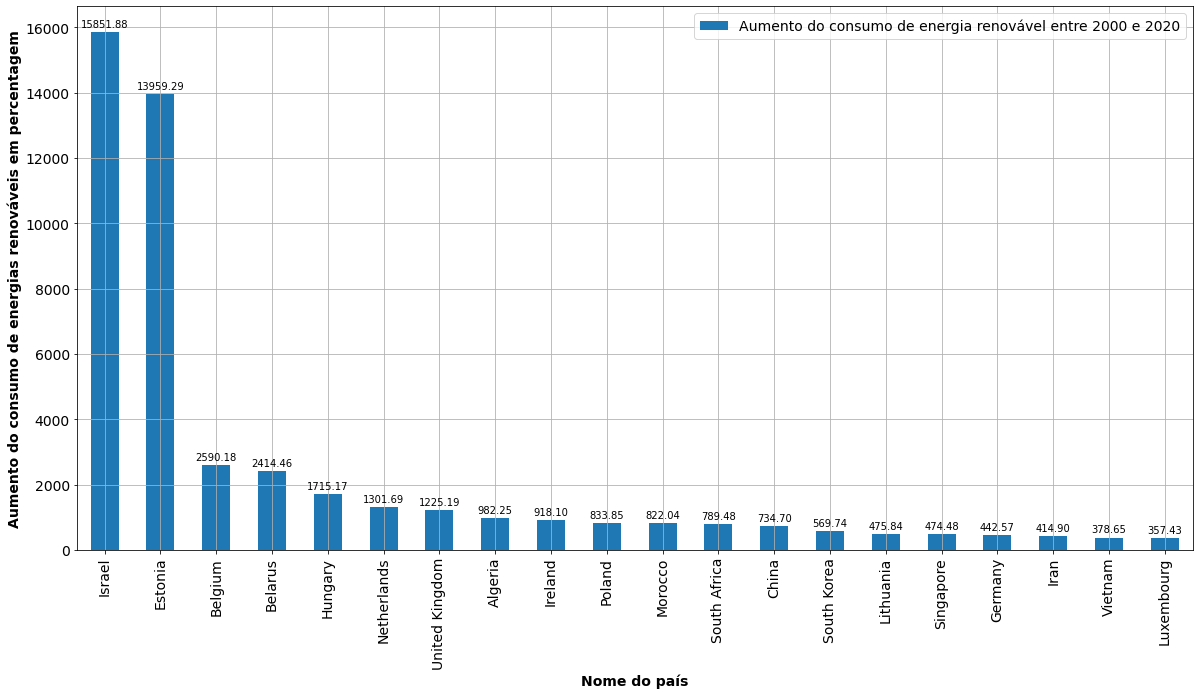

Year,Entity,2000,2020,renewablesTransitionPercentage
0,Israel,0.08611,13.73634,"15,851.88290"
1,Estonia,0.02689,3.78039,"13,959.28950"
2,Belgium,1.89022,50.85045,"2,590.18377"
3,Belarus,0.07500,1.88584,"2,414.45950"
4,Hungary,0.55944,10.15488,"1,715.17175"
5,Netherlands,4.73292,66.34083,"1,301.68778"
6,United Kingdom,20.63943,273.51219,"1,225.19281"
7,Algeria,0.15000,1.62338,982.25222
8,Ireland,3.12292,31.79445,918.10107
9,Poland,6.08489,56.82346,833.84549


In [19]:
countryEnergyTransitionRenewables = energySourceCountry.copy(deep=True)

cond1 = ['World', 'OECD', 'Europe', 'North America', 'European Union']
countryEnergyTransitionRenewables = countryEnergyTransitionRenewables[(~countryEnergyTransitionRenewables['Entity'].isin(cond1)) & (countryEnergyTransitionRenewables['Code'].notna()) & ((countryEnergyTransitionRenewables['Year'] == 2020) | ((countryEnergyTransitionRenewables['Year'] == 2000)) & (countryEnergyTransitionRenewables['renewable_energy'] > 0))]

countryEnergyTransitionRenewables = countryEnergyTransitionRenewables.sort_values(by=['renewable_energy'],ascending=False)

countryEnergyTransitionRenewables
countryEnergyTransitionRenewables = countryEnergyTransitionRenewables.iloc[:,[0, 1, 2, 11]]


countryTotalEnergy = countryEnergyTransitionRenewables.groupby(['Entity', 'Year'])['renewable_energy'].sum()
unstakedValuesCountryEnergy = countryTotalEnergy.unstack()
unstakedValuesCountryEnergy
#unstakedValuesCountryEnergy.columns.tolist()
unstakedValuesCountryEnergy['renewablesTransitionPercentage'] = ((unstakedValuesCountryEnergy[2020] - unstakedValuesCountryEnergy[2000])/ abs(unstakedValuesCountryEnergy[2000])) * 100
unstakedValuesCountryEnergy = unstakedValuesCountryEnergy.sort_values(by=['renewablesTransitionPercentage'],ascending=False).iloc[:20]
unstakedValuesCountryEnergy = unstakedValuesCountryEnergy.reset_index()



unstakedValuesCountryEnergyPlot = pd.DataFrame(unstakedValuesCountryEnergy, columns=['Entity', 'renewablesTransitionPercentage'])
plots = unstakedValuesCountryEnergyPlot.plot(x='Entity', y=['renewablesTransitionPercentage'], kind='bar', figsize=(20,10))

#Colocar os valores por cima de cada coluna
for bar in plots.patches:
    
  plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')


plt.grid()
plt.xlabel('Nome do país', fontweight='bold')
plt.ylabel('Aumento do consumo de energias renováveis em percentagem', fontweight='bold')
plt.legend(['Aumento do consumo de energia renovável entre 2000 e 2020'])
plt.show()

unstakedValuesCountryEnergy

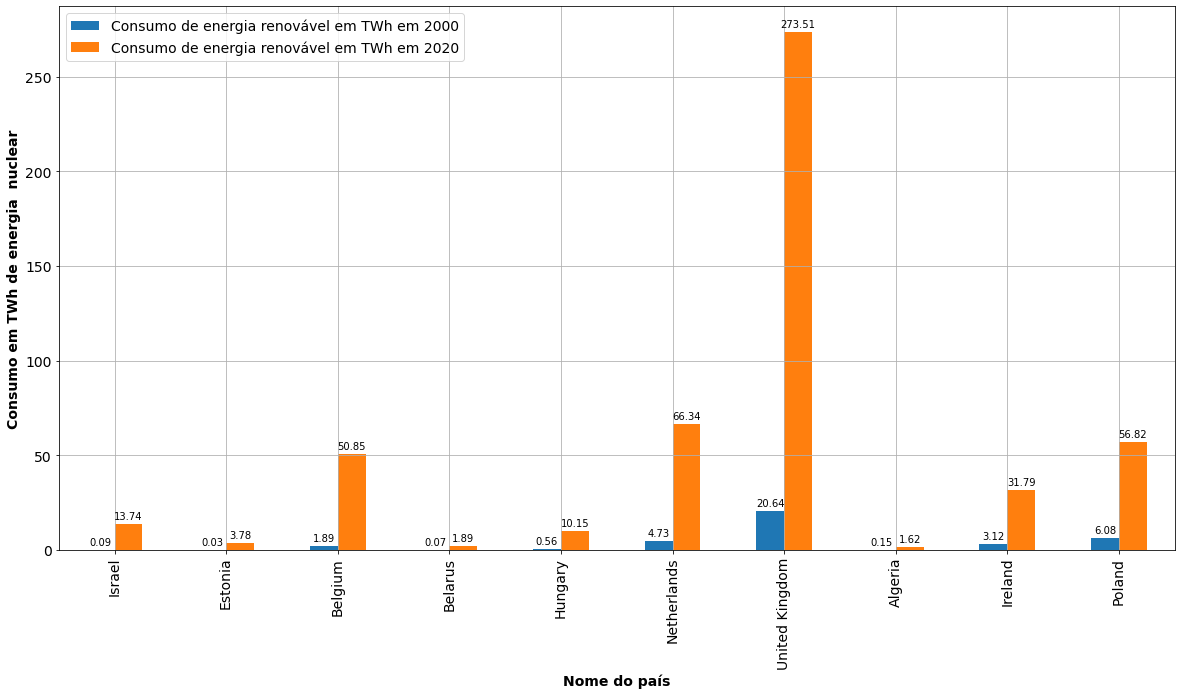

In [20]:

unstakedValuesCountryEnergyPlot2 = pd.DataFrame(unstakedValuesCountryEnergy, columns=['Entity', 2000, 2020]).iloc[:-10]
plots = unstakedValuesCountryEnergyPlot2.plot(x='Entity', y=[2000, 2020], kind='bar', figsize=(20,10))

#Colocar os valores por cima de cada coluna
for bar in plots.patches:
    
  plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')


plt.grid()
plt.xlabel('Nome do país', fontweight='bold')
plt.ylabel('Consumo em TWh de energia  nuclear', fontweight='bold')
plt.legend(['Consumo de energia renovável em TWh em 2000', 'Consumo de energia renovável em TWh em 2020'])
plt.show()

#### Pergunta 6: Países que consomem mais energia;

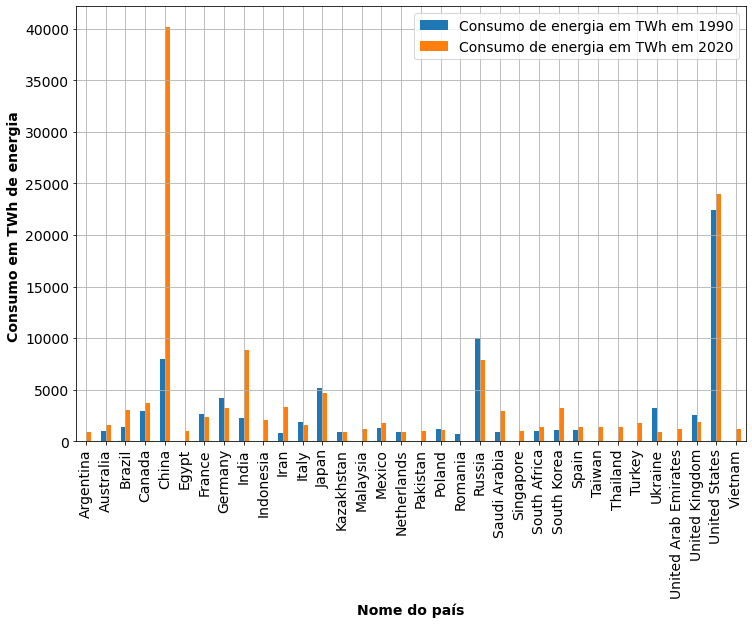

In [21]:
#Diferença no consumo de energia entre 1990 e 2020
countryTotalEnergy = energySourceCountry.copy()
#countryEnergy['renewable_nuclear'] = countryEnergy['Nuclear Consumption - TWh'] + countryEnergy['Hydro Consumption - TWh'] + countryEnergy['Wind Consumption - TWh'] + countryEnergy['Solar Consumption - TWh'] + countryEnergy['Geo Biomass Other - TWh']

countryTotalEnergy['allEnergyConsumption'] = countryTotalEnergy.iloc[:,3:11].sum(axis=1)

cond1 = ['World', 'OECD', 'Europe', 'North America', 'European Union']
countryTotalEnergy = countryTotalEnergy[(~countryTotalEnergy['Entity'].isin(cond1)) & (countryTotalEnergy['Code'].notna()) & ((countryTotalEnergy['Year'] == 2020) | (countryTotalEnergy['Year'] == 1990))]

countryTotalEnergy = countryTotalEnergy.sort_values(by=['allEnergyConsumption'],ascending=False)
countryTotalEnergy = countryTotalEnergy.iloc[:,[0, 1, 2, -1]]

countryTotalEnergy.loc[countryTotalEnergy['allEnergyConsumption'] < 700, 'Entity'] = 'Others'
countryTotalEnergy = countryTotalEnergy[(countryTotalEnergy['Entity'] != 'Others')]

countryTotalEnergy

(countryTotalEnergy.groupby(['Year','Entity'])
   .mean().unstack('Year').plot.bar())

plt.grid()
plt.xlabel('Nome do país', fontweight='bold')
plt.ylabel('Consumo em TWh de energia ', fontweight='bold')
plt.legend(['Consumo de energia em TWh em 1990', 'Consumo de energia em TWh em 2020'])
plt.show()



,Code,total_energy
0,BRA,"2,994.01886"
1,CAN,"3,747.74404"
2,CHN,"40,170.77698"
3,DEU,"3,250.35868"
4,FRA,"2,371.48328"
5,IND,"8,812.95549"
6,IRN,"3,341.65312"
7,JPN,"4,674.82703"
8,KOR,"3,240.79182"
9,Others,"40,103.85536"


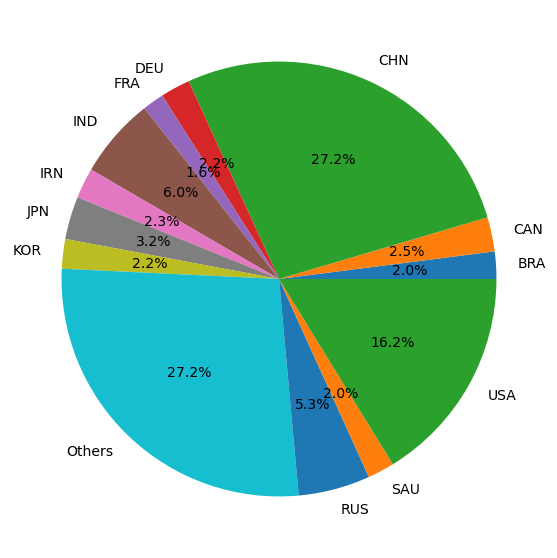

In [22]:
#Da energia total consumida em 2020, quais foram os responsáveis pelo seu maior consumo
cond1 = ['World', 'OECD', 'Europe', 'North America', 'European Union']
countryTotalEnergy = energySourceCountry.copy()
countryTotalEnergy = countryTotalEnergy[(~countryTotalEnergy['Entity'].isin(cond1)) & (countryTotalEnergy['Code'].notna()) & (countryTotalEnergy['Year'] == 2020)]
#energySourceCountry1 = energySourceCountry.loc[energySourceCountry.groupby('Year')['Nuclear Consumption - TWh']]
#energySourceCountry1 = energySourceCountry1.sort_values(by=['Nuclear Consumption - TWh'],ascending=False)
countryTotalEnergy
soma = countryTotalEnergy['total_energy'].sum()
threshold = 0.015 * soma

df_draw = countryTotalEnergy.copy()
df_draw.loc[df_draw['total_energy'] < threshold, 'Code'] = 'Others'
df_draw = df_draw.groupby('Code')['total_energy'].sum().reset_index()
plt.figure(figsize=(20, 10))
plt.pie(df_draw['total_energy'], labels=df_draw['Code'], autopct='%1.1f%%');

df_draw


#### Pergunta 7: Correlação entre emissão de CO2 e produção de eletricidade via fontes renováveis;

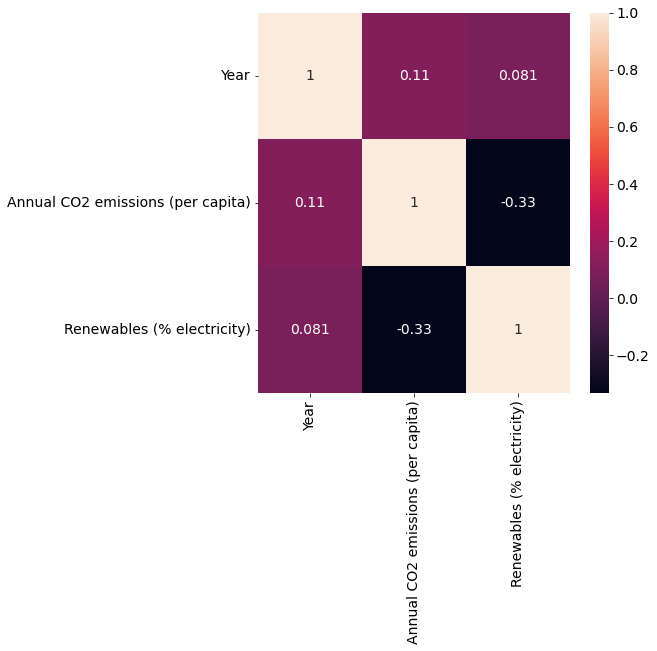

,Entity,Code,Year,Annual CO2 emissions (per capita),Renewables (% electricity),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,Asia
1,Afghanistan,AFG,1949,0.00190,NaN,NaN
2,Afghanistan,AFG,1950,0.01090,NaN,NaN
3,Afghanistan,AFG,1951,0.01170,NaN,NaN
4,Afghanistan,AFG,1952,0.01150,NaN,NaN
...,...,...,...,...,...,...
24665,Zimbabwe,ZWE,2017,0.67300,58.27600,NaN
24666,Zimbabwe,ZWE,2018,0.82100,59.14600,NaN
24667,Zimbabwe,ZWE,2019,0.74760,67.63900,NaN
24668,Zimbabwe,ZWE,2020,0.70860,67.63900,NaN


In [23]:
co2PerCapitaCorrelation = co2PerCapita.copy(deep=True)

correlation = co2PerCapitaCorrelation.corr()

fig = plt.figure(figsize=(7, 7))
plt.rcParams['font.size'] = '14'
sns.heatmap(correlation, annot=True)
plt.show()
co2PerCapitaCorrelation

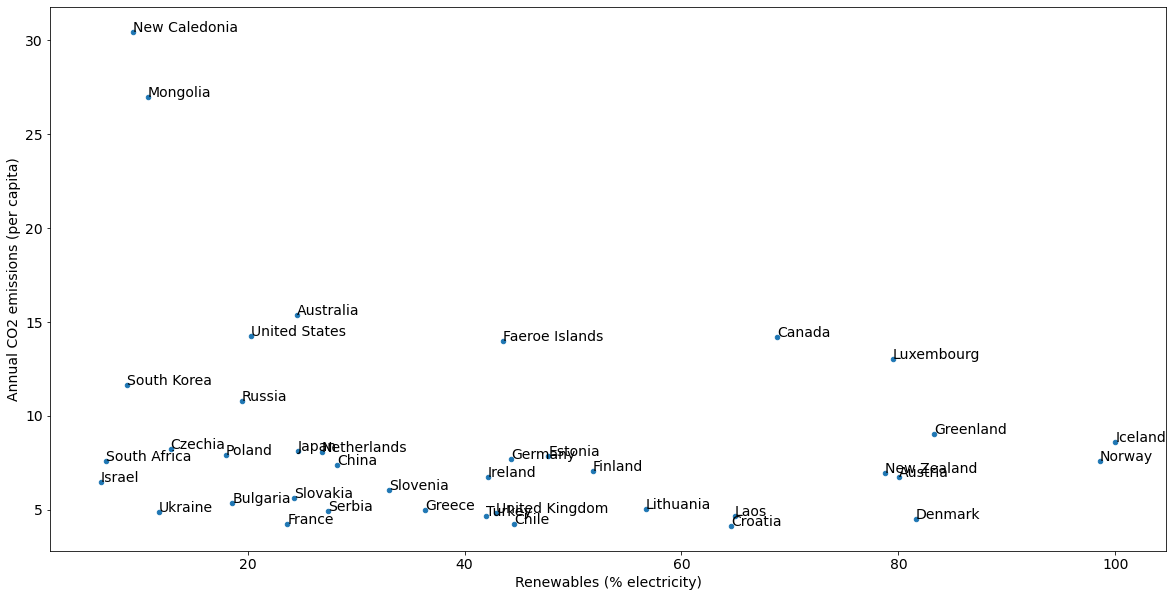

,Entity,Code,Year,Annual CO2 emissions (per capita),Renewables (% electricity),Continent
1535,Australia,AUS,2020,15.36840,24.52300,NaN
1739,Austria,AUT,2020,6.73240,80.09800,NaN
3599,Bulgaria,BGR,2020,5.38880,18.59300,NaN
4130,Canada,CAN,2020,14.19690,68.80800,NaN
4474,Chile,CHL,2020,4.24620,44.55800,NaN
4595,China,CHN,2020,7.41170,28.27800,NaN
5133,Croatia,HRV,2020,4.13660,64.57700,NaN
5518,Czechia,CZE,2020,8.21500,12.90900,NaN
5799,Denmark,DNK,2020,4.52240,81.62200,NaN
6614,Estonia,EST,2020,7.87950,47.73100,NaN


In [42]:
co2PerCapitaScatter = co2PerCapita.copy(deep=True)

co2PerCapitaScatter = co2PerCapitaScatter[(co2PerCapitaScatter['Code'].notna()) & (co2PerCapitaScatter['Year'] == 2020) & (co2PerCapitaScatter['Renewables (% electricity)'].notna()) & (co2PerCapitaScatter['Annual CO2 emissions (per capita)'] > 4) &(co2PerCapitaScatter['Renewables (% electricity)'] > 4)]
l = ['ABW', 'COK', 'CYP', 'GNQ', 'IRN', 'KAZ', 'MYS', 'MTQ', 'OWID_WRL', 'TWN', 'BEL', 'GLP', 'HUN', 'REU', 'ITA', 'ESP', 'BIH']
co2PerCapitaScatter = co2PerCapitaScatter[(~co2PerCapitaScatter['Code'].isin(l))]

df = pd.DataFrame(co2PerCapitaScatter, columns=['Entity', 'Annual CO2 emissions (per capita)', 'Renewables (% electricity)'])

plots = df.plot(x='Renewables (% electricity)', y='Annual CO2 emissions (per capita)', kind='scatter', figsize=(20,10))


for idx, row in df.iterrows():
    #if ((row['Renewables (% electricity)'] > 8) and (row['Annual CO2 emissions (per capita)'] > 7)):
        plots.annotate(row['Entity'], (row['Renewables (% electricity)'], row['Annual CO2 emissions (per capita)']) )
# force matplotlib to draw the graph
plt.show()
co2PerCapitaScatter

#### Pergunta 8: Países que produzem mais energia

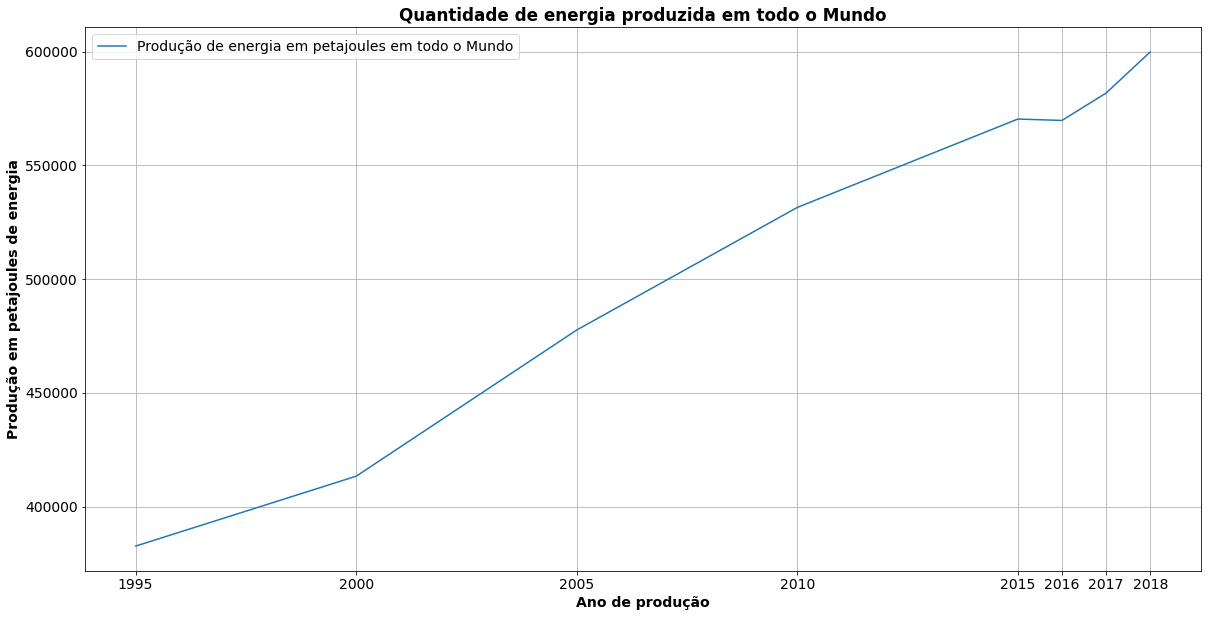

In [25]:
productionAndSupplyEnergyWorld = productionAndSupplyEnergy.copy()

productionAndSupplyEnergyWorld = productionAndSupplyEnergyWorld[(productionAndSupplyEnergyWorld['Series'] == 'Primary energy production (petajoules)') & (productionAndSupplyEnergyWorld['Country/Region'] == 'Total, all countries or areas')]
productionAndSupplyEnergyWorld['Value'] =  productionAndSupplyEnergyWorld['Value'].replace(',','', regex=True)
productionAndSupplyEnergyWorld['Value'] = productionAndSupplyEnergyWorld['Value'].astype(str).astype(int)


productionAndSupplyEnergyWorldPlot = pd.DataFrame(productionAndSupplyEnergyWorld, columns=['Year', 'Value'])
plots = productionAndSupplyEnergyWorldPlot.plot(x='Year', y='Value', kind='line', figsize=(20,10), xticks=productionAndSupplyEnergyWorldPlot['Year'])

plt.grid()
plt.title('Quantidade de energia produzida em todo o Mundo', fontweight='bold')
plt.xlabel('Ano de produção', fontweight='bold')
plt.ylabel('Produção em petajoules de energia', fontweight='bold')
plt.legend(['Produção de energia em petajoules em todo o Mundo'])
plt.show()

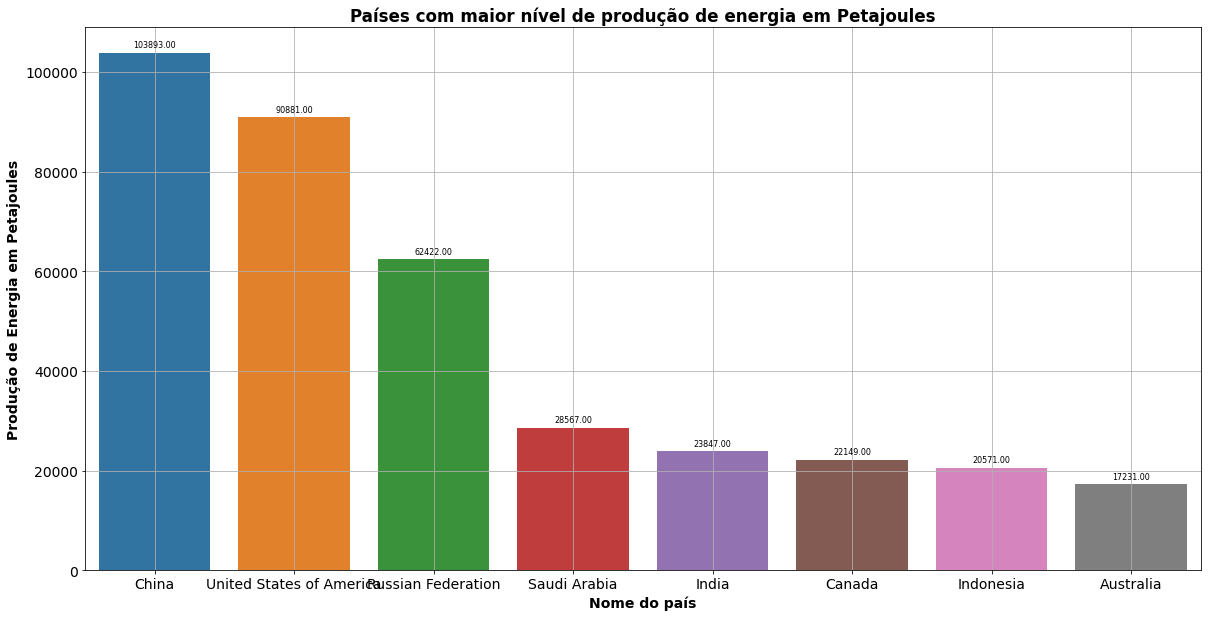

In [26]:
countryEnergyProduction = productionAndSupplyEnergy.copy()


countryEnergyProduction['Value'] =  countryEnergyProduction['Value'].replace(',','', regex=True)
countryEnergyProduction['Value'] = countryEnergyProduction['Value'].astype(str).astype(int)

cond1 = ['Total, all countries or areas', 'Asia', 'North America', 'Europe', 'Africa', 'South America', 'Oceania']
cond2 = countryEnergyProduction['Series'] == 'Primary energy production (petajoules)'
cond3 = countryEnergyProduction['Value'] > 0
cond4 = countryEnergyProduction['Year'] == 2018

countryEnergyProduction = countryEnergyProduction[(~countryEnergyProduction['Country/Region'].isin(cond1)) & (cond2) & (cond3) & (cond4)]
countryEnergyProduction = countryEnergyProduction.sort_values(by=['Value'],ascending=False).iloc[:8]


countryEnergyProductionPlot = pd.DataFrame(countryEnergyProduction, columns=["Country/Region", 'Value'])
plt.figure(figsize=(20, 10))
plots = sns.barplot(x="Country/Region", y="Value", data=countryEnergyProductionPlot)

#Colocar os valores por cima de cada coluna
for bar in plots.patches:
    
  plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

plt.grid()
plt.xlabel('Nome do país', fontweight='bold')
plt.ylabel('Produção de Energia em Petajoules', fontweight='bold')
plt.title('Países com maior nível de produção de energia em Petajoules', fontweight='bold')
plt.show()


#### Pergunta 9: Países que importam mais energia;

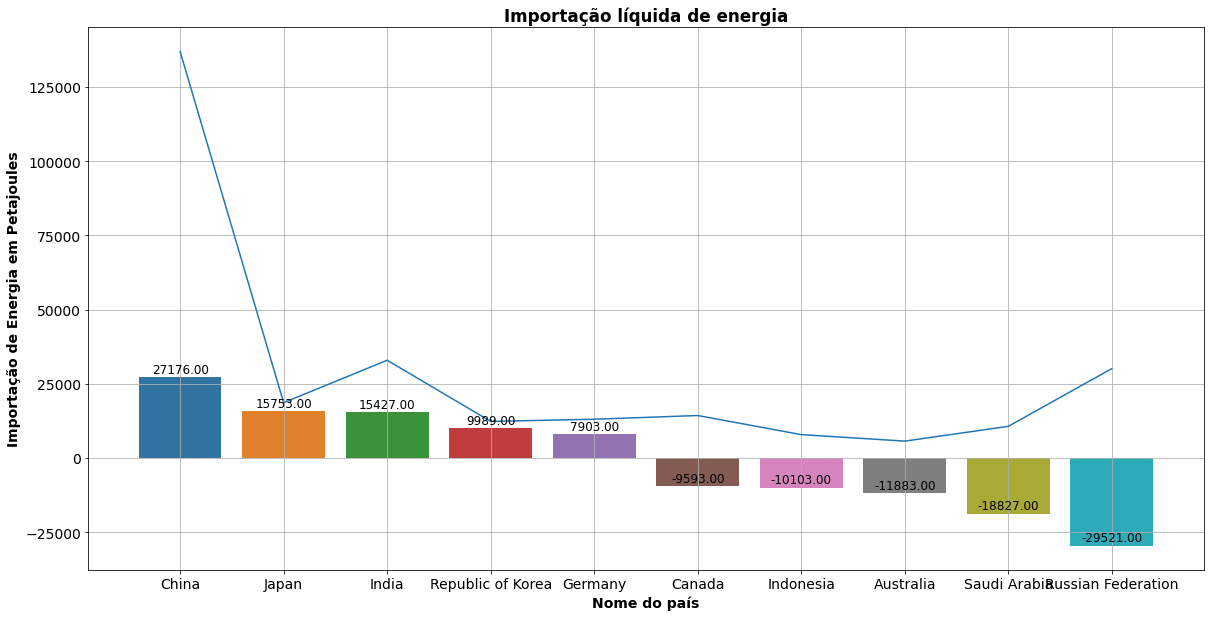

,Country/Region,Code,Year_x,Coal Consumption - TWh,Oil Consumption - TWh,Gas Consumption - TWh,Nuclear Consumption - TWh,Hydro Consumption - TWh,Wind Consumption - TWh,Solar Consumption - TWh,...,renewable_energy,renewable_nuclear,total_energy,poluent_energy,renewable_nuclear_percentage,total_energy_pj,ID,Year_y,Series,Value
2,China,CHN,2018,"22,530.48472","7,517.87459","2,839.25000",733.18713,"2,979.68991",909.15205,439.66374,...,"4,422.22950","5,155.41663","38,043.02595","32,887.60931",0.13552,"136,954.89342",156,2018,Net imports [Imports - Exports - Bunkers] (pet...,27176
6,Japan,JPN,2018,"1,386.59734","2,105.89577","1,157.08156",122.04773,201.58120,16.01798,154.37780,...,402.10890,524.15664,"5,173.73130","4,649.57466",0.10131,"18,625.43268",392,2018,Net imports [Imports - Exports - Bunkers] (pet...,15753
4,India,IND,2018,"5,163.24901","2,688.03539",580.89914,97.05583,347.33940,149.89616,90.29712,...,614.75676,711.81260,"9,143.99613","8,432.18354",0.07784,"32,918.38608",356,2018,Net imports [Imports - Exports - Bunkers] (pet...,15427
9,Republic of Korea,KOR,2018,"1,007.74880","1,451.17276",578.04007,331.81132,8.34943,6.12616,22.88563,...,52.86491,384.67623,"3,421.63787","3,036.96164",0.11242,"12,317.89633",410,2018,Net imports [Imports - Exports - Bunkers] (pet...,9989
3,Germany,DEU,2018,806.69000,"1,286.68261",858.50722,188.90132,44.67471,273.27003,113.79064,...,482.81390,671.71522,"3,623.59505","2,951.87984",0.18537,"13,044.94219",276,2018,Net imports [Imports - Exports - Bunkers] (pet...,7903
1,Canada,CAN,2018,181.33036,"1,315.04400","1,164.21250",248.61544,959.09318,82.37660,9.43691,...,"1,061.44829","1,310.06373","3,970.65060","2,660.58686",0.32994,"14,294.34214",124,2018,Net imports [Imports - Exports - Bunkers] (pet...,-9593
5,Indonesia,IDN,2018,788.47634,894.72121,445.28587,0.00000,41.82244,0.46720,0.04968,...,56.66933,56.66933,"2,185.15275","2,128.48342",0.02593,"7,866.54992",360,2018,Net imports [Imports - Exports - Bunkers] (pet...,-10103
0,Australia,AUS,2018,508.76767,590.74403,358.26206,0.00000,43.09242,40.41714,30.65106,...,117.74877,117.74877,"1,575.52252","1,457.77376",0.07474,"5,671.88109",36,2018,Net imports [Imports - Exports - Bunkers] (pet...,-11883
8,Saudi Arabia,SAU,2018,1.18938,"1,834.41494","1,121.00000",0.00000,0.00000,0.00000,0.53176,...,0.53176,0.53176,"2,957.13609","2,956.60433",0.00018,"10,645.68992",682,2018,Net imports [Imports - Exports - Bunkers] (pet...,-18827
7,Russian Federation,RUS,2018,"1,007.85580","1,822.91869","4,544.99313",508.46167,473.80680,0.58943,1.55202,...,476.45256,984.91424,"8,360.68185","7,375.76762",0.11780,"30,098.45467",643,2018,Net imports [Imports - Exports - Bunkers] (pet...,-29521


In [27]:
countryEnergyNetImports = productionAndSupplyEnergy.copy(deep=True)
energyConsumption = energySourceCountry.copy(deep=True)

countryEnergyNetImports['Value'] =  countryEnergyNetImports['Value'].replace(',','', regex=True)
countryEnergyNetImports['Value'] = countryEnergyNetImports['Value'].astype(str).astype(int)

cond1 = ['Total, all countries or areas', 'Asia', 'North America', 'Europe', 'Africa', 'South America', 'Oceania']
cond2 = countryEnergyNetImports['Series'] == 'Net imports [Imports - Exports - Bunkers] (petajoules)'
cond3 = countryEnergyNetImports['Year'] == 2018

countryEnergyNetImports = countryEnergyNetImports[(~countryEnergyNetImports['Country/Region'].isin(cond1)) & (cond2) & (cond3)]
countryEnergyNetImports = countryEnergyNetImports.sort_values(by=['Value'],ascending=False)

countryEnergyNetImportsTop_Bottom = pd.concat([countryEnergyNetImports.head(5),countryEnergyNetImports.tail(5)])

energyConsumption['Entity'] = energyConsumption['Entity'].replace('Russia', 'Russian Federation')
energyConsumption['Entity'] = energyConsumption['Entity'].replace('South Korea', 'Republic of Korea')
energyConsumption = energyConsumption.loc[(energyConsumption['Year'] == 2018) & (energyConsumption['Entity'].isin(countryEnergyNetImportsTop_Bottom['Country/Region'].values))]
energyConsumption['total_energy_pj'] = energyConsumption['total_energy']*3.6
energyConsumption.rename(columns = {'Entity':'Country/Region'}, inplace = True)

energyConsumption = pd.merge(energyConsumption, countryEnergyNetImportsTop_Bottom, on='Country/Region', how='outer')
energyConsumption = energyConsumption.sort_values(by=['Value'], ascending=False)

countryEnergyNetImportsTop_BottomPlot = pd.DataFrame(countryEnergyNetImportsTop_Bottom, columns=["Country/Region", 'Value'])
plt.figure(figsize=(20, 10))
plots = sns.barplot(x="Country/Region", y="Value", data=countryEnergyNetImportsTop_BottomPlot)

#Colocar os valores por cima de cada coluna
for bar in plots.patches:
    
  plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.grid()
plt.plot(energyConsumption['Country/Region'], energyConsumption['total_energy_pj'])
plt.xlabel('Nome do país', fontweight='bold')
plt.ylabel('Importação de Energia em Petajoules', fontweight='bold')
plt.title('Importação líquida de energia', fontweight='bold')
plt.show()
energyConsumption

#### Pergunta 10:Variação do preço de energia nos países em todo o mundo

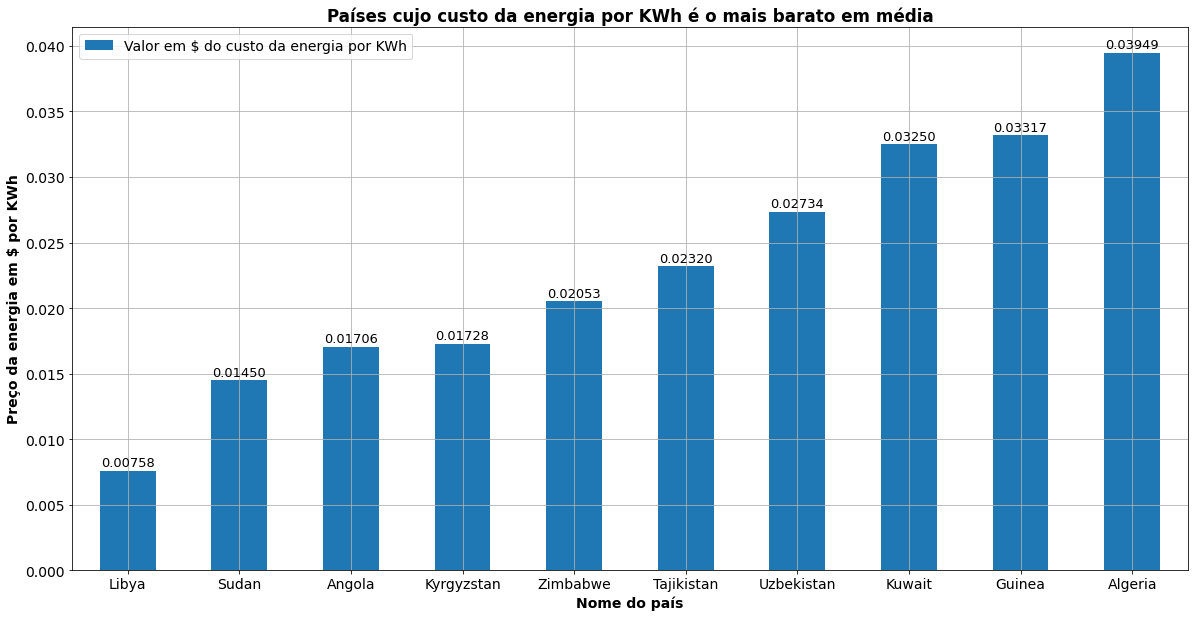

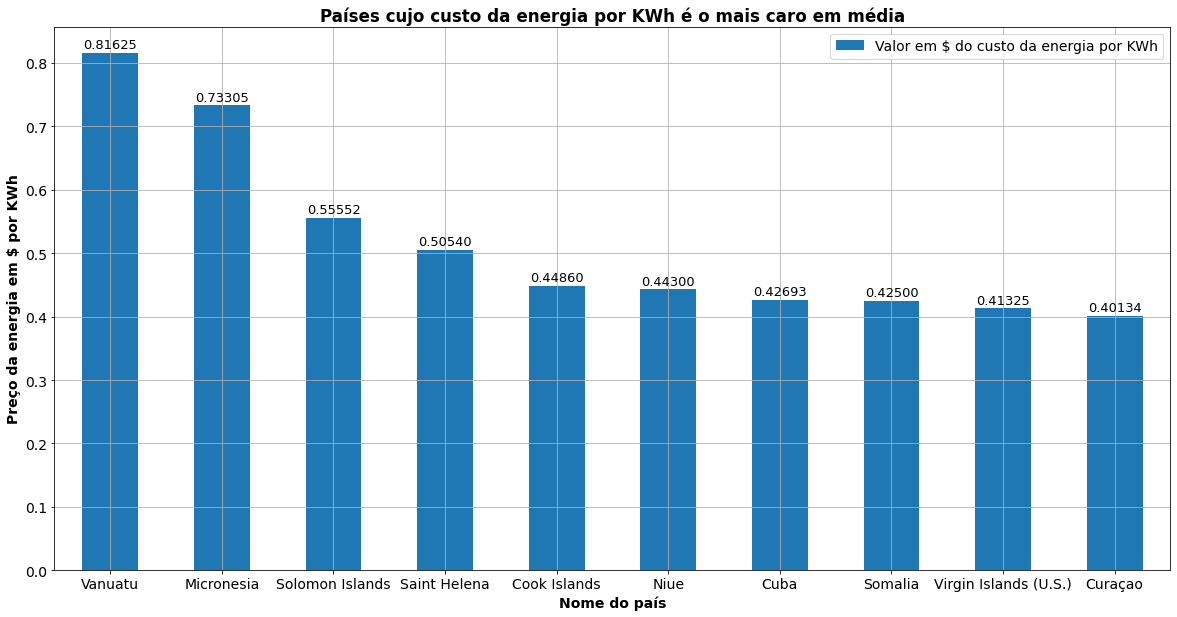

,Country name,Cheapest KW/h (USD),Most expensive KW/h (USD),mean
227,Vanuatu,0.16619,1.46631,0.81625
225,Micronesia,0.37120,1.09490,0.73305
229,Solomon Islands,0.30008,0.81096,0.55552
228,Saint Helena,0.39900,0.61180,0.50540
226,Cook Islands,0.36024,0.53696,0.44860
224,Niue,0.44300,0.44300,0.44300
220,Cuba,0.01386,0.84000,0.42693
222,Somalia,0.36000,0.49000,0.42500
221,Virgin Islands (U.S.),0.40000,0.42650,0.41325
223,Curaçao,0.35748,0.44521,0.40134


In [28]:
electricityPrice2021_DS = electricityPrice2021.copy(deep=True)

electricityPrice2021_DS.drop(['Global Totals (2021)', 'Rank', 'Continental region', 'Tariffs measured', 'Average price of 1KW/h (local currency)', 'Currency', 'Cheapest 1KW/h (Local currency)', 'Sample date', 'Unnamed: 15'], axis = 1, inplace = True)
electricityPrice2021_DS = electricityPrice2021_DS.sort_values(by=['Average price of 1KW/h (USD)'],ascending=True)

electricityPrice2021_DSTop_Bottom = pd.concat([electricityPrice2021_DS.head(10),electricityPrice2021_DS.tail(10)])

electricityPrice2021_DS1 = electricityPrice2021_DSTop_Bottom.iloc[:10]
electricityPrice2021_DS2 = electricityPrice2021_DSTop_Bottom.iloc[10:]


electricityPrice2021_DS1 = pd.DataFrame(electricityPrice2021_DS1, columns=['Country name', 'Cheapest KW/h (USD)','Most expensive KW/h (USD)'])
electricityPrice2021_DS1['mean'] = (electricityPrice2021_DS1['Cheapest KW/h (USD)'] + electricityPrice2021_DS1['Most expensive KW/h (USD)']) / 2
electricityPrice2021_DS1 = electricityPrice2021_DS1.sort_values(by=['mean'],ascending=True)

plots = electricityPrice2021_DS1.plot(x='Country name', y='mean', kind='bar', figsize=(20,10), stacked=True, rot=0)

#Colocar os valores por cima de cada coluna
for bar in plots.patches:
    
  plots.annotate(format(bar.get_height(), '.5f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')
plt.grid()
plt.title('Países cujo custo da energia por KWh é o mais barato em média', fontweight='bold')
plt.xlabel('Nome do país', fontweight='bold')
plt.ylabel('Preço da energia em $ por KWh', fontweight='bold')
plt.legend(['Valor em $ do custo da energia por KWh'])
plt.show()

electricityPrice2021_DS2 = pd.DataFrame(electricityPrice2021_DS2, columns=['Country name', 'Cheapest KW/h (USD)','Most expensive KW/h (USD)'])
electricityPrice2021_DS2['mean'] = (electricityPrice2021_DS2['Cheapest KW/h (USD)'] + electricityPrice2021_DS2['Most expensive KW/h (USD)']) / 2
electricityPrice2021_DS2 = electricityPrice2021_DS2.sort_values(by=['mean'],ascending=False)

electricityPrice2021_DS2['Country name'] = electricityPrice2021_DS2['Country name'].replace('Micronesia (Federated States of)', 'Micronesia')

plots = electricityPrice2021_DS2.plot(x='Country name', y='mean', kind='bar', figsize=(20,10), stacked=True, rot=0)

#Colocar os valores por cima de cada coluna
for bar in plots.patches:
    
  plots.annotate(format(bar.get_height(), '.5f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')
plt.grid()
plt.title('Países cujo custo da energia por KWh é o mais caro em média', fontweight='bold')
plt.xlabel('Nome do país', fontweight='bold')
plt.ylabel('Preço da energia em $ por KWh', fontweight='bold')
plt.legend(['Valor em $ do custo da energia por KWh'])
plt.show()

electricityPrice2021_DS2

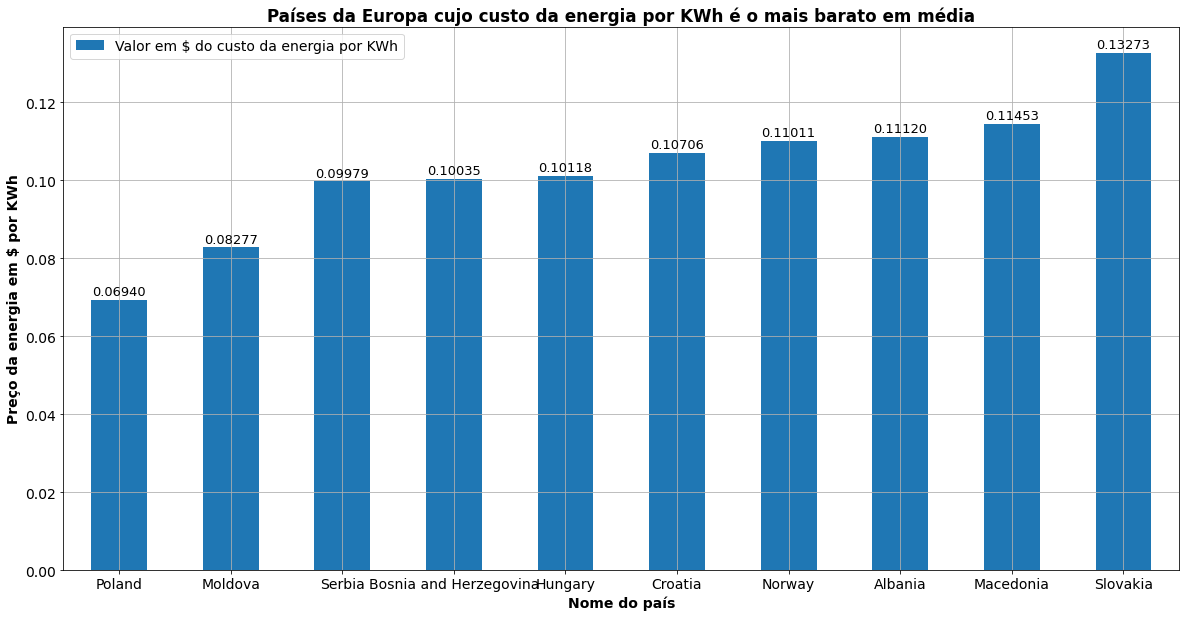

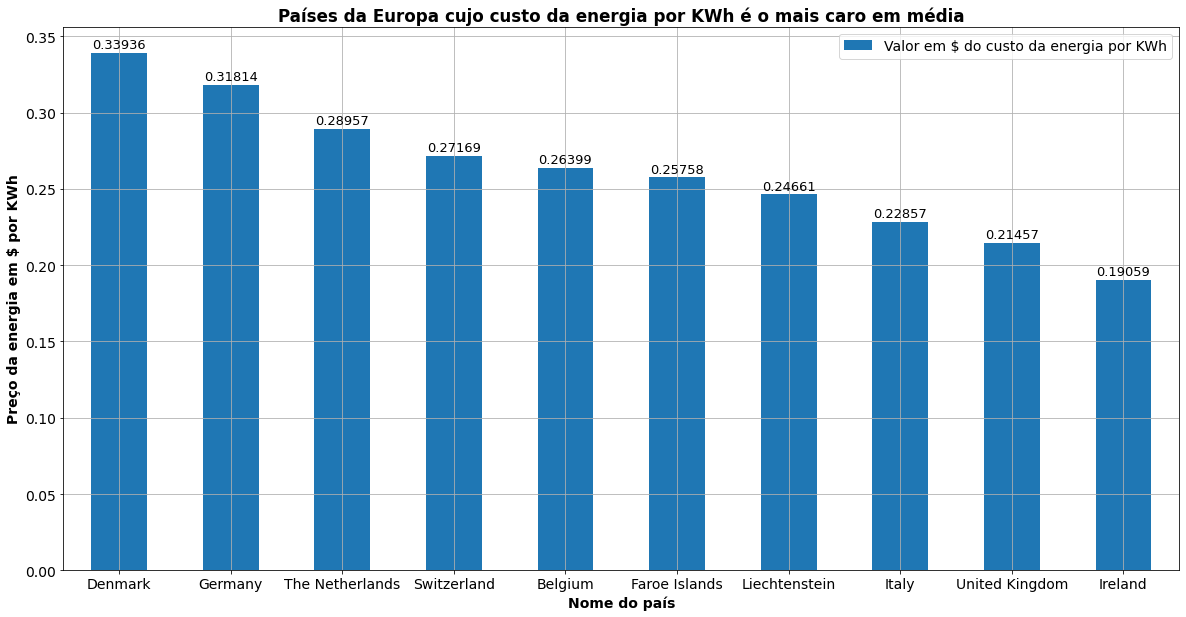

,Country name,Cheapest KW/h (USD),Most expensive KW/h (USD),mean
216,Denmark,0.28070,0.39803,0.33936
210,Germany,0.26141,0.37487,0.31814
199,The Netherlands,0.16944,0.40970,0.28957
182,Switzerland,0.14571,0.39767,0.27169
185,Belgium,0.16247,0.36551,0.26399
198,Faroe Islands,0.21970,0.29545,0.25758
175,Liechtenstein,0.21500,0.27823,0.24661
168,Italy,0.14749,0.30964,0.22857
189,United Kingdom,0.12858,0.30056,0.21457
171,Ireland,0.10580,0.27538,0.19059


In [29]:
electricityPrice2021_DS = electricityPrice2021.copy(deep=True)

electricityPrice2021_DS = electricityPrice2021_DS.loc[(electricityPrice2021_DS['Continental region'] == 'EASTERN EUROPE') | (electricityPrice2021_DS['Continental region'] == 'WESTERN EUROPE')]
electricityPrice2021_DS.drop(['Global Totals (2021)', 'Rank', 'Continental region', 'Tariffs measured', 'Average price of 1KW/h (local currency)', 'Currency', 'Cheapest 1KW/h (Local currency)', 'Sample date', 'Unnamed: 15'], axis = 1, inplace = True)
electricityPrice2021_DS = electricityPrice2021_DS.sort_values(by=['Average price of 1KW/h (USD)'],ascending=True)

electricityPrice2021_DSTop_Bottom = pd.concat([electricityPrice2021_DS.head(10),electricityPrice2021_DS.tail(10)])

electricityPrice2021_DS1 = electricityPrice2021_DSTop_Bottom.iloc[:10]
electricityPrice2021_DS2 = electricityPrice2021_DSTop_Bottom.iloc[10:]


electricityPrice2021_DS1 = pd.DataFrame(electricityPrice2021_DS1, columns=['Country name', 'Cheapest KW/h (USD)','Most expensive KW/h (USD)'])
electricityPrice2021_DS1['mean'] = (electricityPrice2021_DS1['Cheapest KW/h (USD)'] + electricityPrice2021_DS1['Most expensive KW/h (USD)']) / 2
electricityPrice2021_DS1 = electricityPrice2021_DS1.sort_values(by=['mean'],ascending=True)



plots = electricityPrice2021_DS1.plot(x='Country name', y='mean', kind='bar', figsize=(20,10), stacked=True, rot=0)

#Colocar os valores por cima de cada coluna
for bar in plots.patches:
    
  plots.annotate(format(bar.get_height(), '.5f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')
plt.grid()
plt.title('Países da Europa cujo custo da energia por KWh é o mais barato em média', fontweight='bold')
plt.xlabel('Nome do país', fontweight='bold')
plt.ylabel('Preço da energia em $ por KWh', fontweight='bold')
plt.legend(['Valor em $ do custo da energia por KWh'])
plt.show()

electricityPrice2021_DS2 = pd.DataFrame(electricityPrice2021_DS2, columns=['Country name', 'Cheapest KW/h (USD)','Most expensive KW/h (USD)'])
electricityPrice2021_DS2['mean'] = (electricityPrice2021_DS2['Cheapest KW/h (USD)'] + electricityPrice2021_DS2['Most expensive KW/h (USD)']) / 2
electricityPrice2021_DS2 = electricityPrice2021_DS2.sort_values(by=['mean'],ascending=False)

electricityPrice2021_DS2['Country name'] = electricityPrice2021_DS2['Country name'].replace('Micronesia (Federated States of)', 'Micronesia')

plots = electricityPrice2021_DS2.plot(x='Country name', y='mean', kind='bar', figsize=(20,10), stacked=True, rot=0)

#Colocar os valores por cima de cada coluna
for bar in plots.patches:
    
  plots.annotate(format(bar.get_height(), '.5f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')
plt.grid()
plt.title('Países da Europa cujo custo da energia por KWh é o mais caro em média', fontweight='bold')
plt.xlabel('Nome do país', fontweight='bold')
plt.ylabel('Preço da energia em $ por KWh', fontweight='bold')
plt.legend(['Valor em $ do custo da energia por KWh'])
plt.show()

electricityPrice2021_DS2